<a href="https://colab.research.google.com/github/farinaz-hatami/Module-3-Assignments/blob/main/OMDS_MODB2_WEEK4_HATAMI_FARINAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

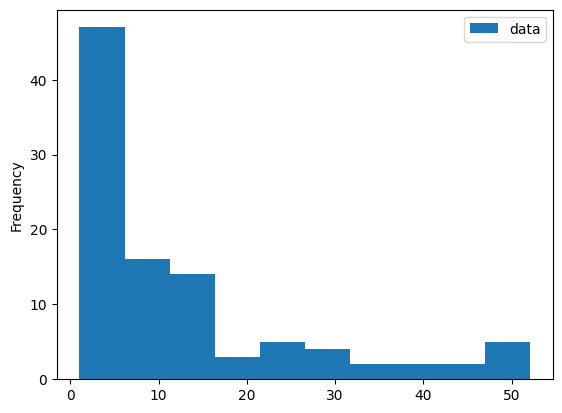

In [ ]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

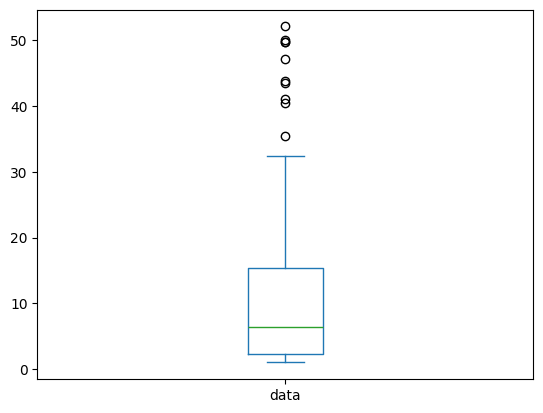

In [2]:
df.plot.box()

* My explanations:

The histogram and boxplot both represent the same drug price data, but they highlight different features of the distribution.


Histogram Pros:
The histogram shows the full shape of the distribution and how frequently different drug price ranges occur. From the histogram, we can see that most drug prices are concentrated at lower values, and fewer drugs have very high prices. This indicates that the data are right-skewed. So,histogram is useful because the shape of the distribution can helps us understand how common different price ranges are.

Boxplot Pros:
The boxplot clearly shows important summary statistics, including the median, quartiles, and potential outliers. From the result, the 75th percentile is approximately 15.46, which means that 75% of the drugs cost less than or equal to 15.46, and the most expensive 25% of drugs cost more than this value. The boxplot makes it easy to identify this cutoff point and see the spread of the data. It also helps detect extreme values. So, It is very useful for comparing spread and identifying expensive values quickly.

Histogram Cons:
The histogram does not show exact summary statistics such as the median, quartiles, or the exact 75th percentile (15.46). It can also be affected by the number of bins chosen, which may make the distribution look slightly different depending on the settings.

Boxplot Cons:
The boxplot does not show the detailed shape of the distribution or how frequently values occur. It summarizes the data, so it does not show the detailed frequency or shape of the distribution like the histogram.

Therefore, the histogram is better for understanding the overall distribution and frequency, while the boxplot is better for understanding summary statistics and identifying expensive drugs. If I had to choose one, I would choose the boxplot because the administrator wants to understand how expensive drugs compare to other prices. The boxplot clearly shows the upper quartile and helps identify the price level where drugs become more expensive relative to the rest.

To improve the formatting, I would add titles and axis labels to both graphs. For example, labeling the x-axis as "Drug Price" and adding a title such as "Distribution of Drug Prices." For the histogram, adjusting the number of bins would make the distribution clearer. For the boxplot, adding a title and labeling would make it easier to interpret. These improvements would make the graphs more clear and informative.

# 3. Homework - working on your datasets
This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
* Draw histograms and histogram variants for each feature or column. (Swarm plot, kde plot, violin plot).

* Draw grouped histograms. For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

* Draw a bar plot to indicate total counts of each categorical variable in a given column.

* Find means, medians, and modes.

Conclusions:
* Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If they are not useable, find some new data!

* What is the overall shape of the distribution? Is it normal, skewed, bimodal, uniform, etc.?

* Are there any outliers present? (Data points that are far from the others.)

* If there are multiple related histograms, how does the distribution change across different groups?

* What are the minimum and maximum values represented in each histogram?

* How do bin sizes affect the histogram? Does changing the bin width reveal different patterns in the data?

* Does the distribution appear normal, or does it have a different distribution?

In [37]:
# Load dataset (Maternal, Child, and Adolescent Health Needs Assessment, 2023-2024)

url = "https://data.sfgov.org/api/views/iqtk-etij/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


# Preview data
print(df.head())

# Check column types
print(df.info())

     Age_group  Sex             Topic         Data_source  \
0  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
1  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
2  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
3  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   
4  0to12months  ALL  HEALTH CONDITION  CDPH BIRTH RECORDS   

                        Health_condition-Data_source     Period    Year  \
0  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2019  2019.0   
1  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2020  2020.0   
2  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2021  2021.0   
3  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...       2022  2022.0   
4  ASSISTED VENTILATION FOR >6 HOURS - CDPH BIRTH...  2014-2016     NaN   

   Denominator Denominator_is  Number_with_outcome  ... Race_ethnicity  \
0       8307.0   TOTAL BIRTHS                 25.0  ...            ALL   
1       7890.0   TOTAL BIRTHS     

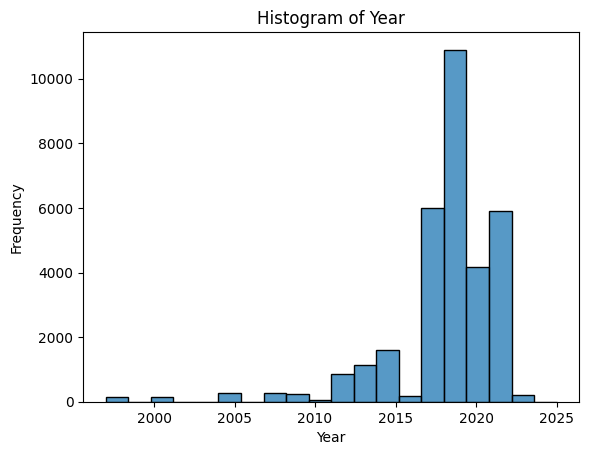

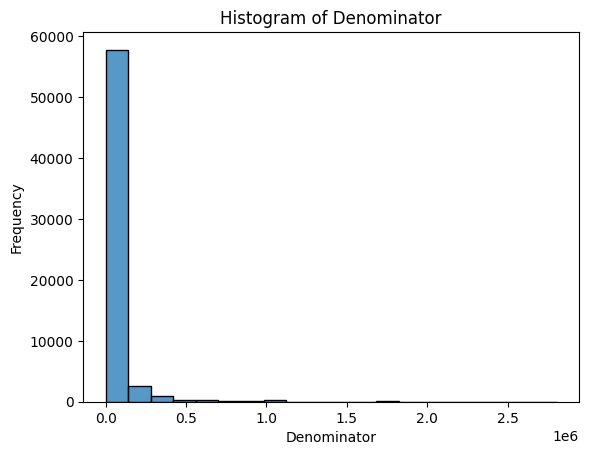

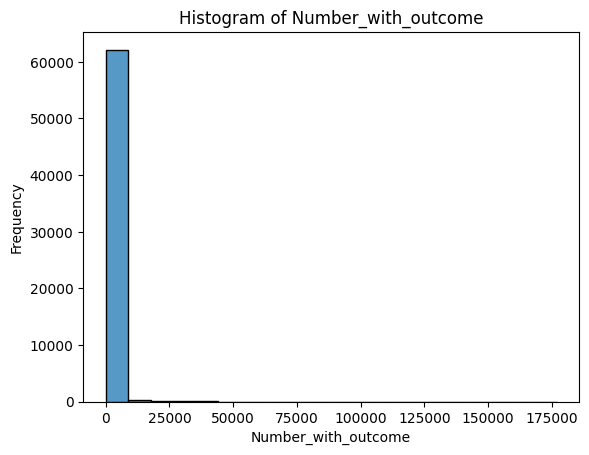

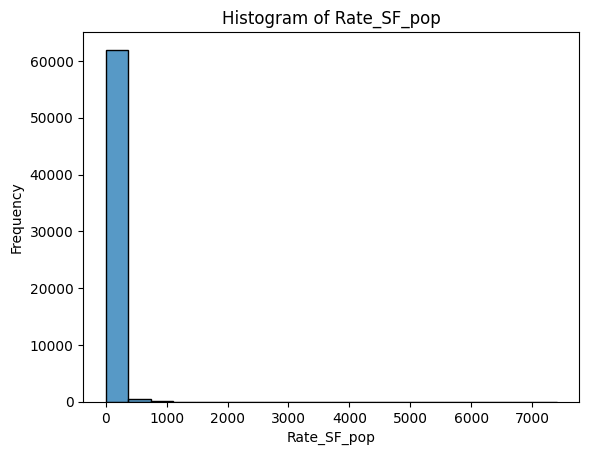

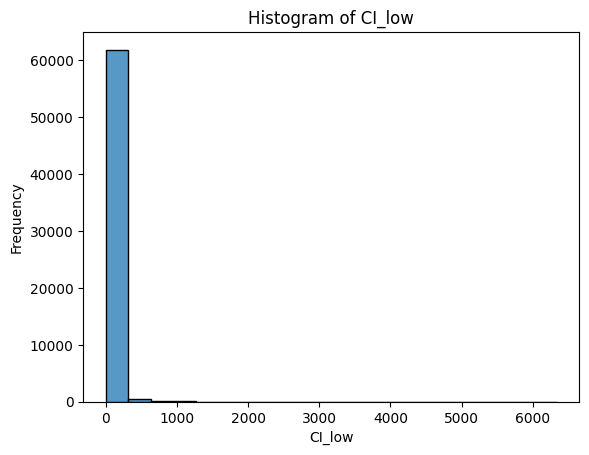

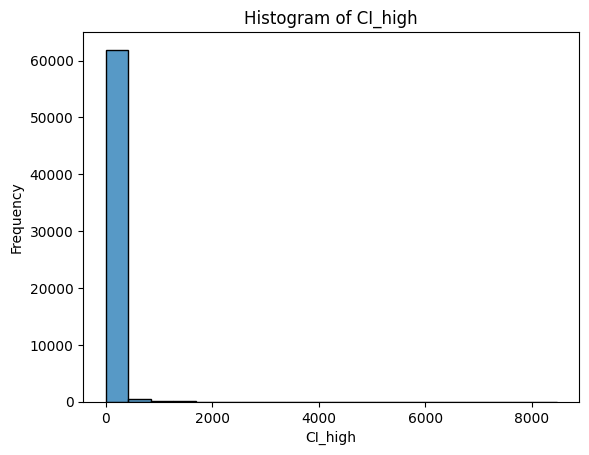

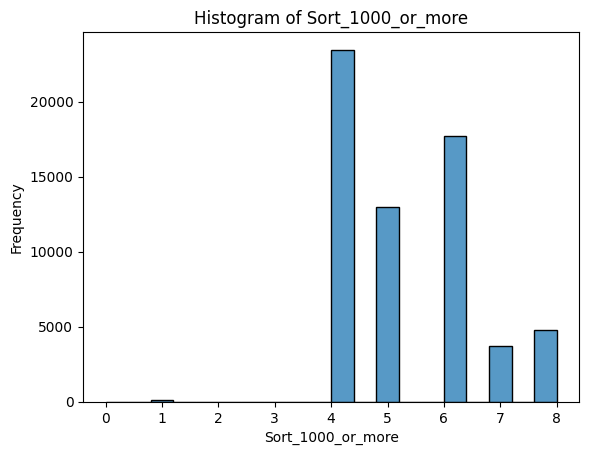

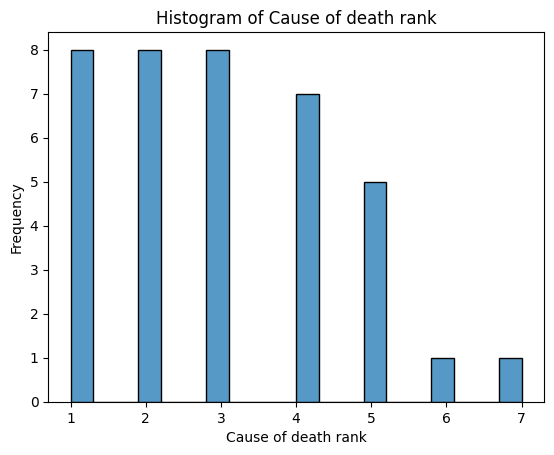

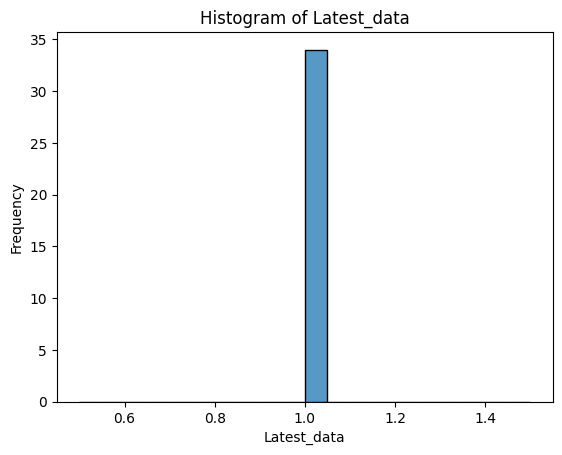

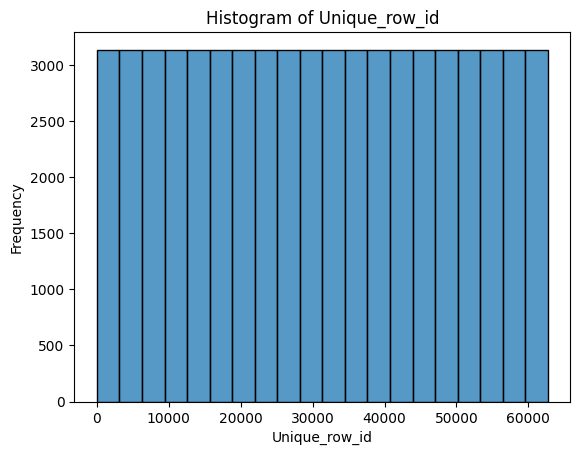

In [38]:
# Question 1: Draw histograms and histogram variants for each feature or column. (Swarm plot, kde plot, violin plot).


# Histogram for each numeric column


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], bins=20, kde=False)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


* My explanation:
For each numeric column, I drew a histogram. For example, in Rate_SF_pop, most of the values are small and concentrated on the left, but there are some higher values that stretch the right side. This shows that the data is right-skewed, meaning most births or health outcomes have low rates and a few have high rates. The histogram helps me see the frequency of different values clearly.

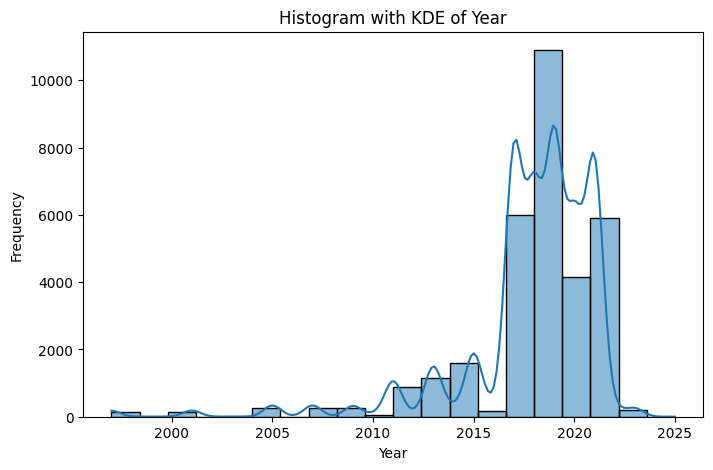

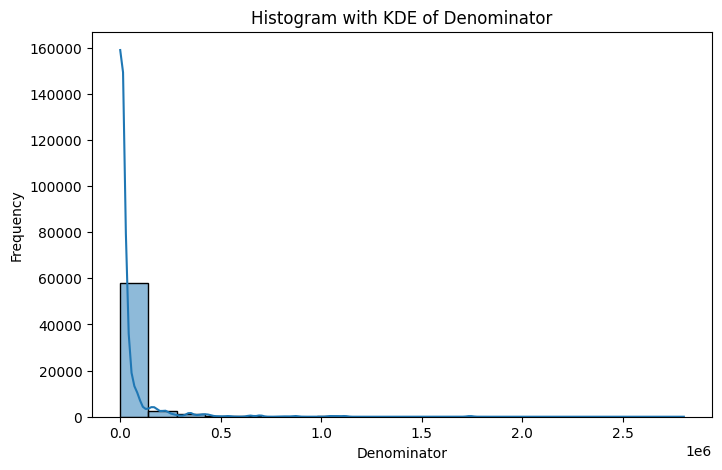

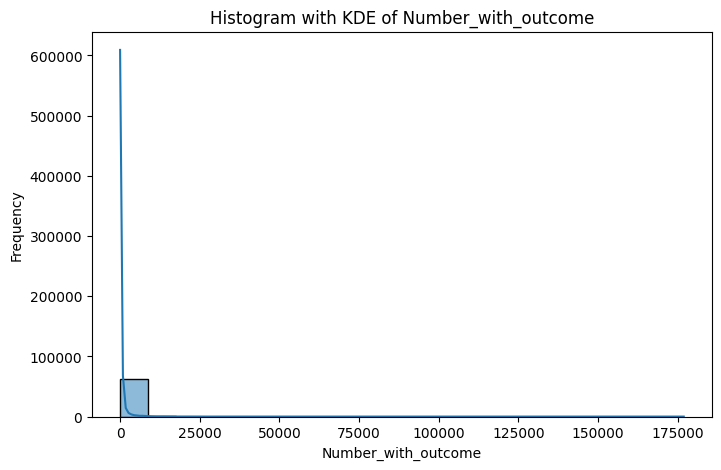

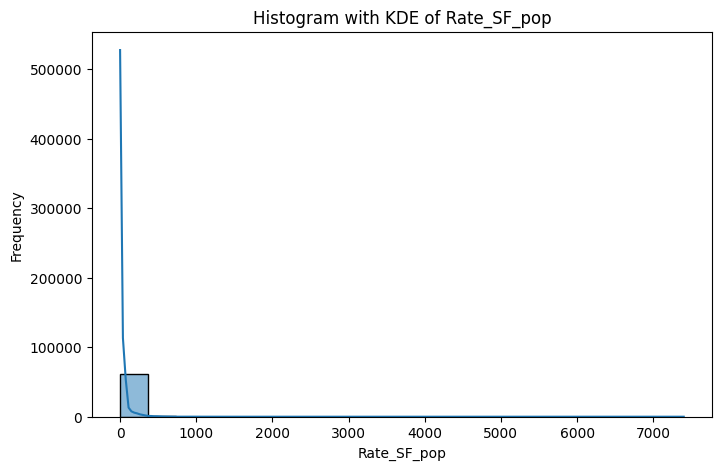

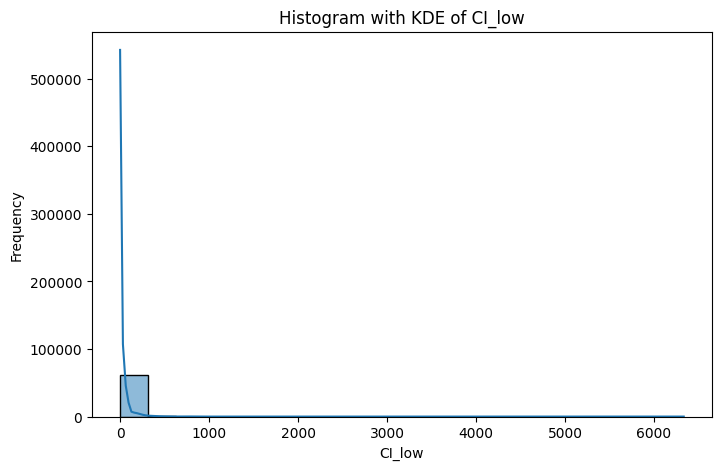

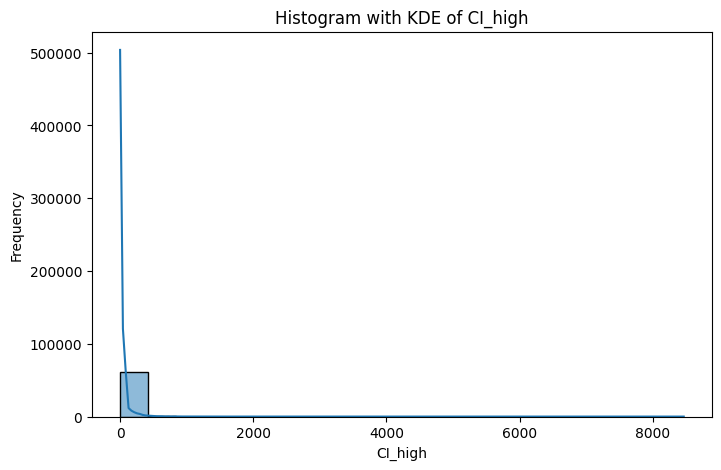

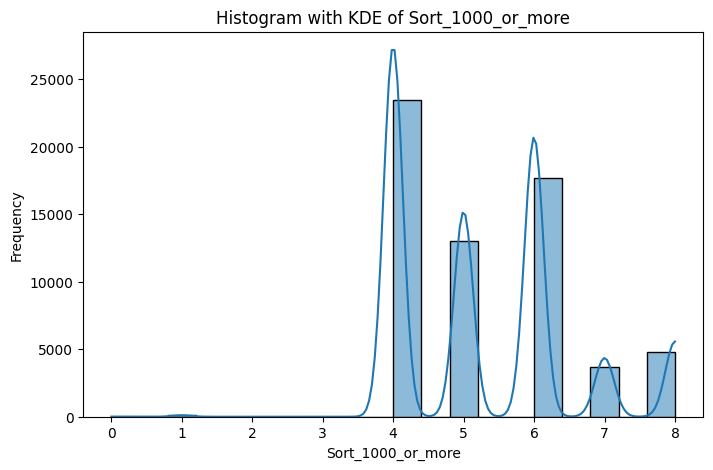

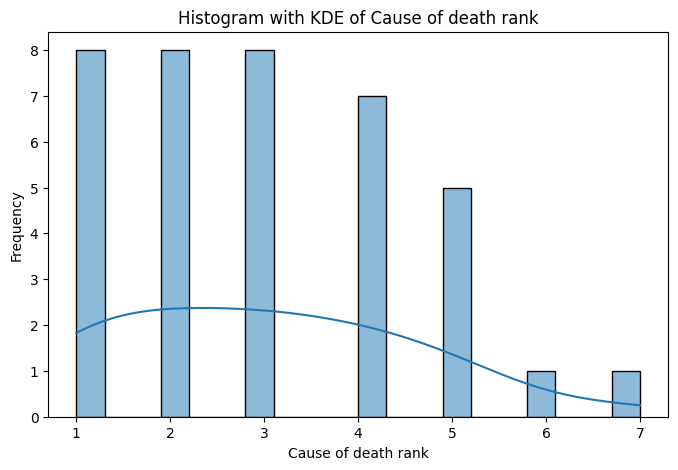

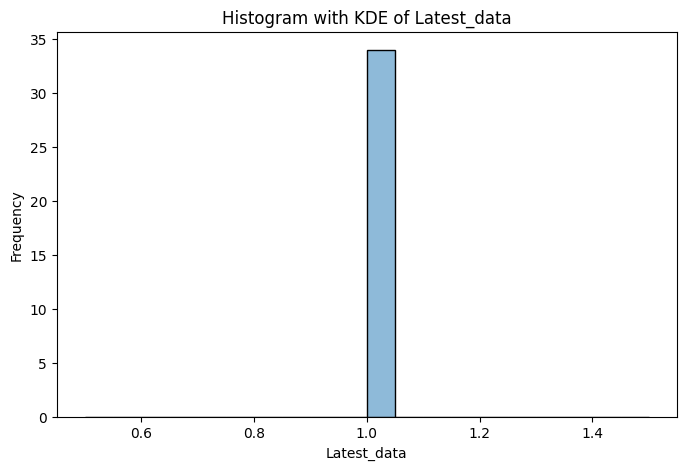

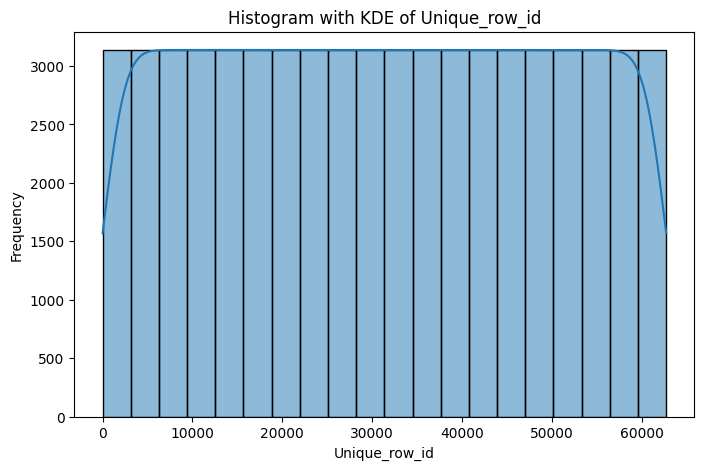

In [39]:
# Histogram with KDE

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    data = df[col].dropna()  # Remove missing values
    if len(data) == 0:
        continue

    # Histogram with KDE
    plt.figure(figsize=(8,5))
    sns.histplot(data, bins=20, kde=True)
    plt.title(f"Histogram with KDE of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


* My explanation:

I added a KDE (smoothed curve) to the histogram to see the shape of the data more clearly. The KDE confirms that the distribution is right-skewed, with most values clustered at lower rates and a long tail of higher values. It shows the overall pattern of the data more smoothly than the histogram alone.

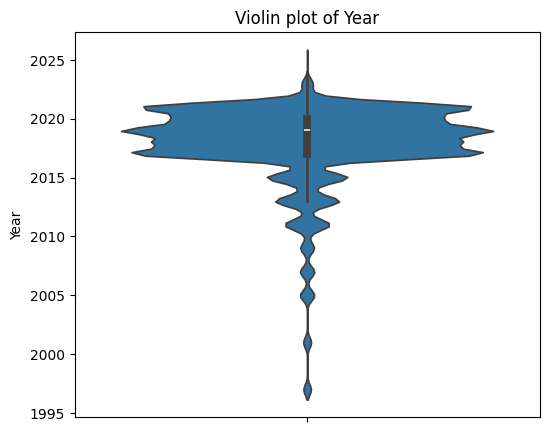

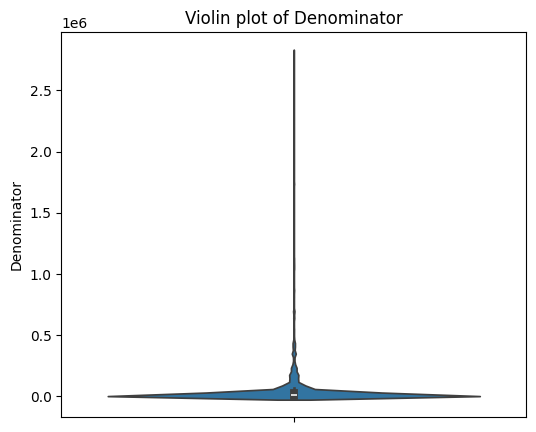

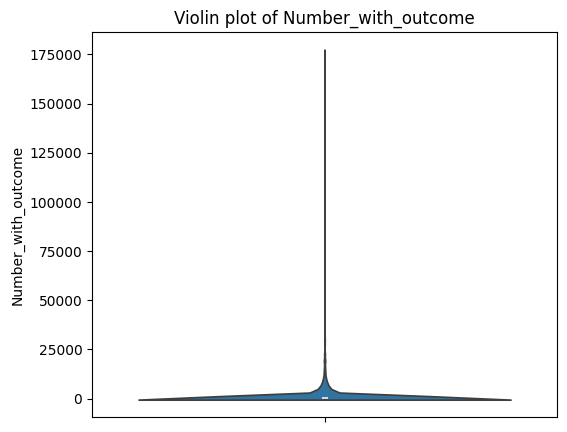

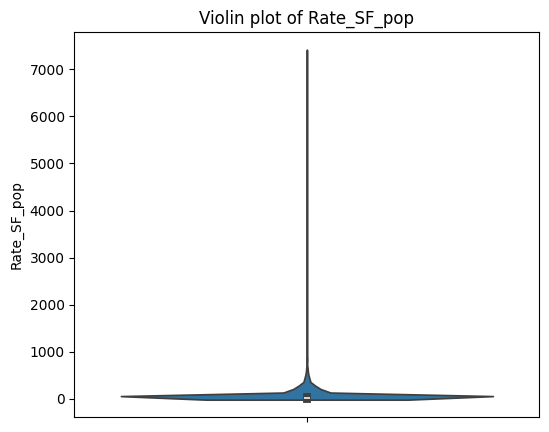

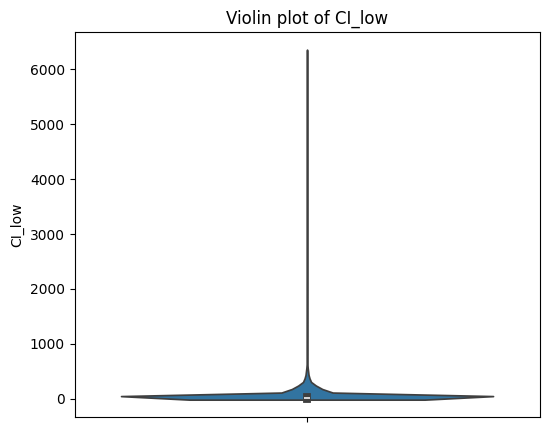

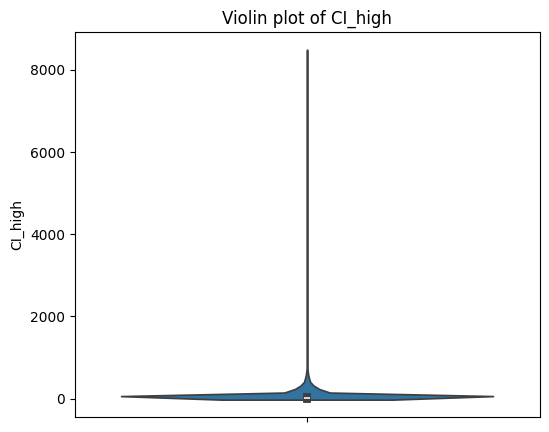

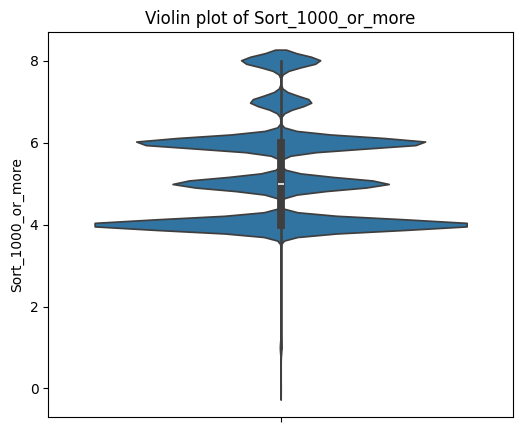

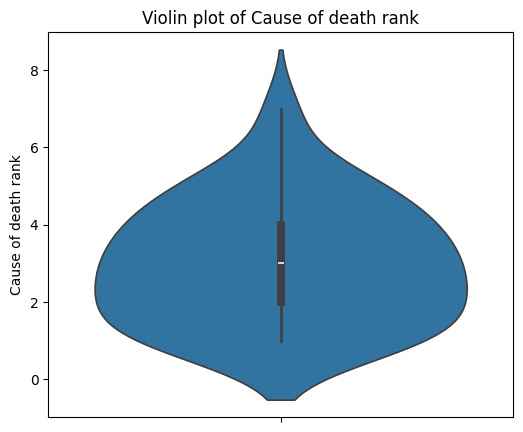

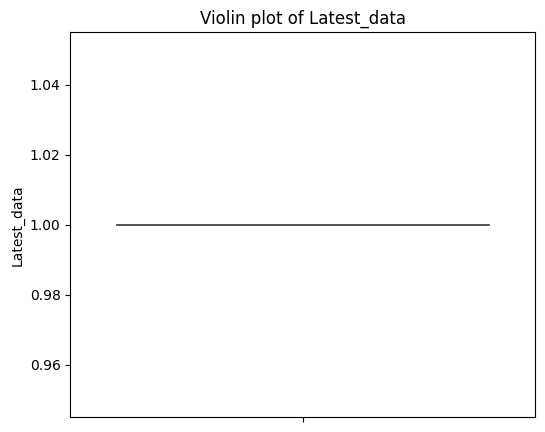

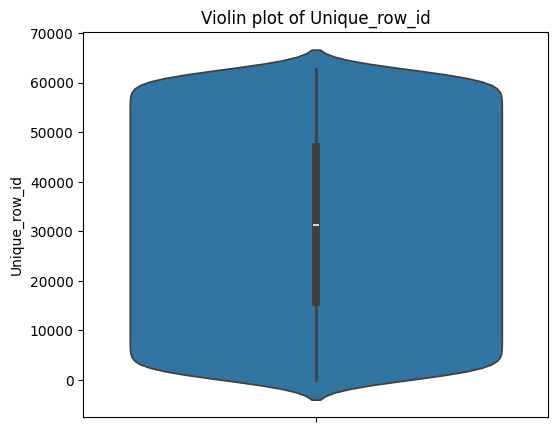

In [40]:
# Violin plot

for col in numeric_cols:
    plt.figure(figsize=(6,5))   # standard size
    sns.violinplot(y=df[col].dropna())
    plt.title(f"Violin plot of {col}")
    plt.ylabel(col)
    plt.show()

* My explanation:

I used violin plots to look at the numeric columns. The violin shows the median, spread, and distribution. For Rate_SF_pop, most values are small, but the upper part of the violin is long, showing a few outliers. This confirms what the histogram and KDE already showed and helps me see the density of values across the range.

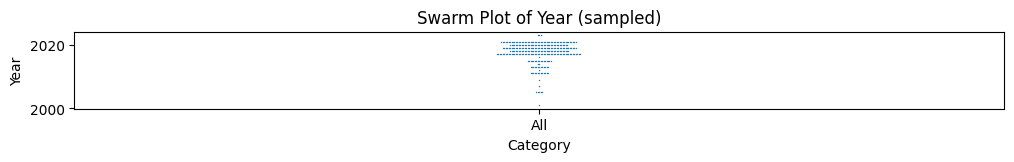

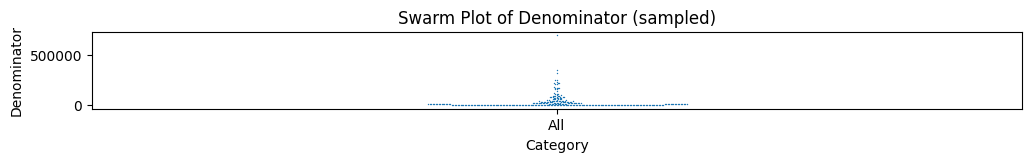

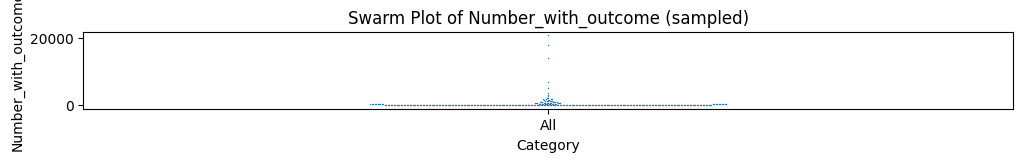

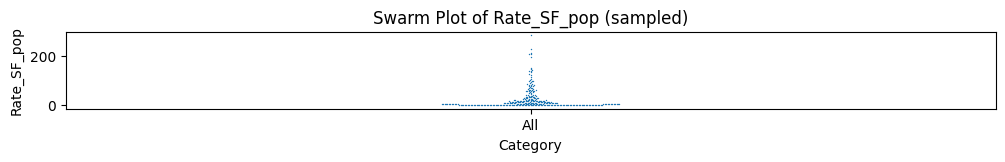

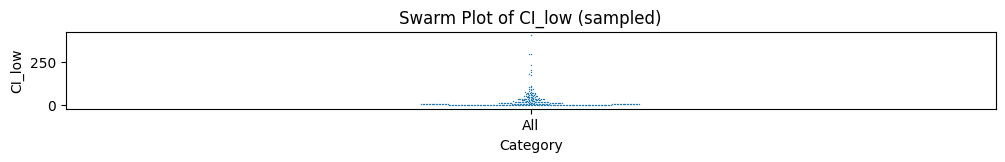

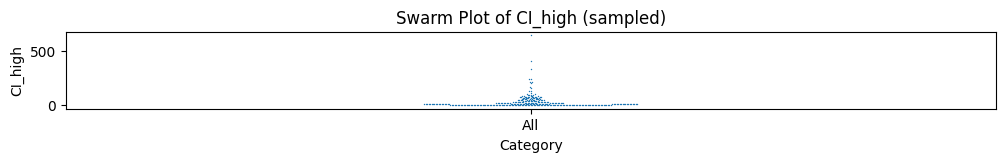

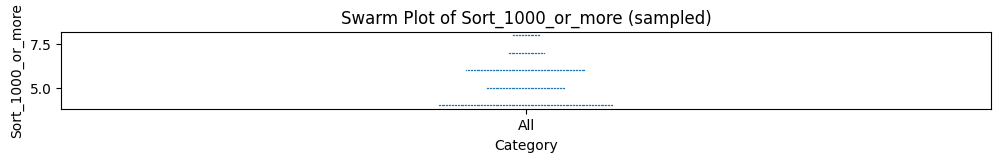

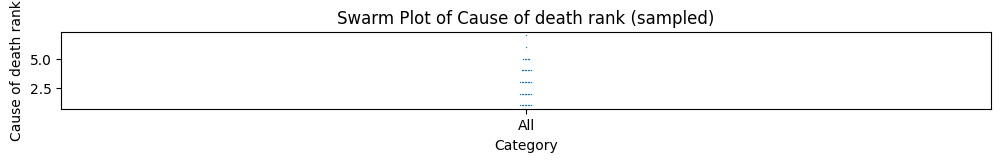

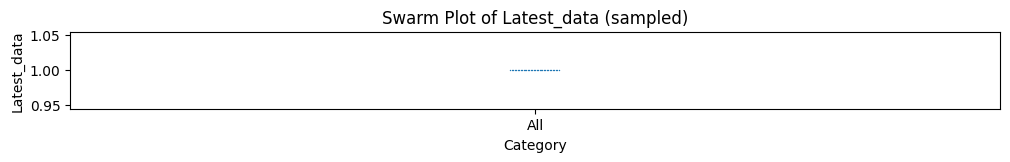

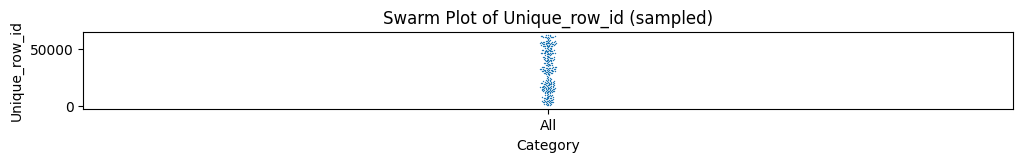

In [41]:
# Swarm plot



# Create a dummy category for all numeric columns
df["Category"] = "All"

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    # Drop missing values
    col_data = df[[col, "Category"]].dropna()
    if len(col_data) == 0:
        continue

    # Sample up to 300 points for readability
    sample_data = col_data.sample(n=min(300, len(col_data)), random_state=0)

    plt.figure(figsize=(12,1))

    try:
        # Try swarmplot first
        sns.swarmplot(x="Category", y=col, data=sample_data, size=1)
        plt.title(f"Swarm Plot of {col} (sampled)")
        plt.xlabel("Category")
        plt.ylabel(col)
        plt.show()
    except UserWarning:
        # Fallback to stripplot if swarmplot fails due to overcrowding
        plt.figure(figsize=(12,1))
        sns.stripplot(x="Category", y=col, data=sample_data, size=2, jitter=True)
        plt.title(f"Strip Plot of {col} (sampled, fallback)")
        plt.xlabel("Category")
        plt.ylabel(col)
        plt.show()


* My explanation:

I used a swarm plot with a dummy category "All" to see individual points. Most points are at the lower end, and a few are very high. I sampled 300 points to avoid overlapping. The swarm plot shows the actual values and outliers clearly. When the points were too crowded, I used a strip plot as a backup.

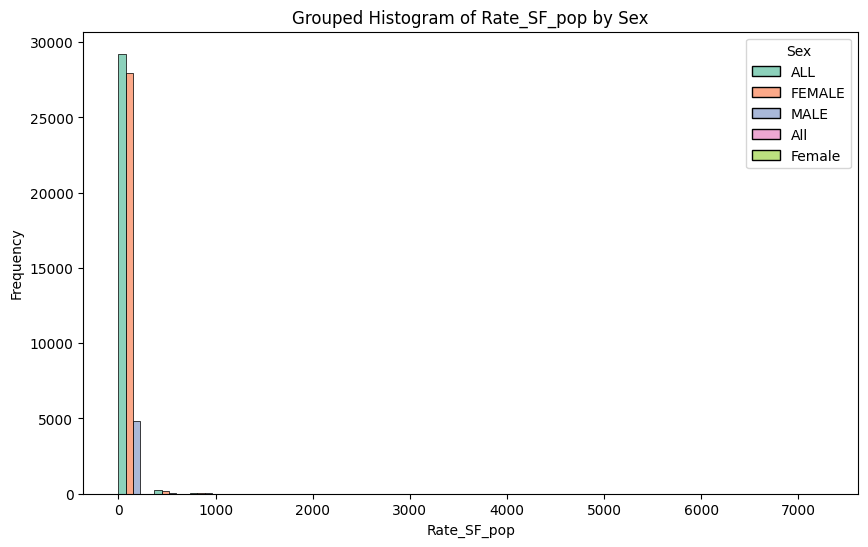

In [48]:
# Question 2: Draw grouped histograms. For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.


plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x="Rate_SF_pop",
    hue="Sex",          # group by Sex
    bins=20,
    multiple="dodge",   # bars side by side
    palette="Set2"
)
plt.title("Grouped Histogram of Rate_SF_pop by Sex")
plt.xlabel("Rate_SF_pop")
plt.ylabel("Frequency")
plt.show()



* My explanation:

For the grouped histogram of Rate_SF_pop by Sex, we can see that most values are concentrated at the lower end, indicating that the majority of outcomes in the dataset occur at smaller rates. Both male and female distributions are very similar, with the side-by-side bars making it easy to compare them directly. A few higher-rate outliers are visible, but they are rare. Overall, the grouped histogram clearly shows how the numeric variable varies across the categorical variable, allowing us to visually compare outcomes between males and females. This effectively answers the homework question, showing the distribution of a numeric feature in the context of different categories, similar to the example of tree heights for maple and oak trees.

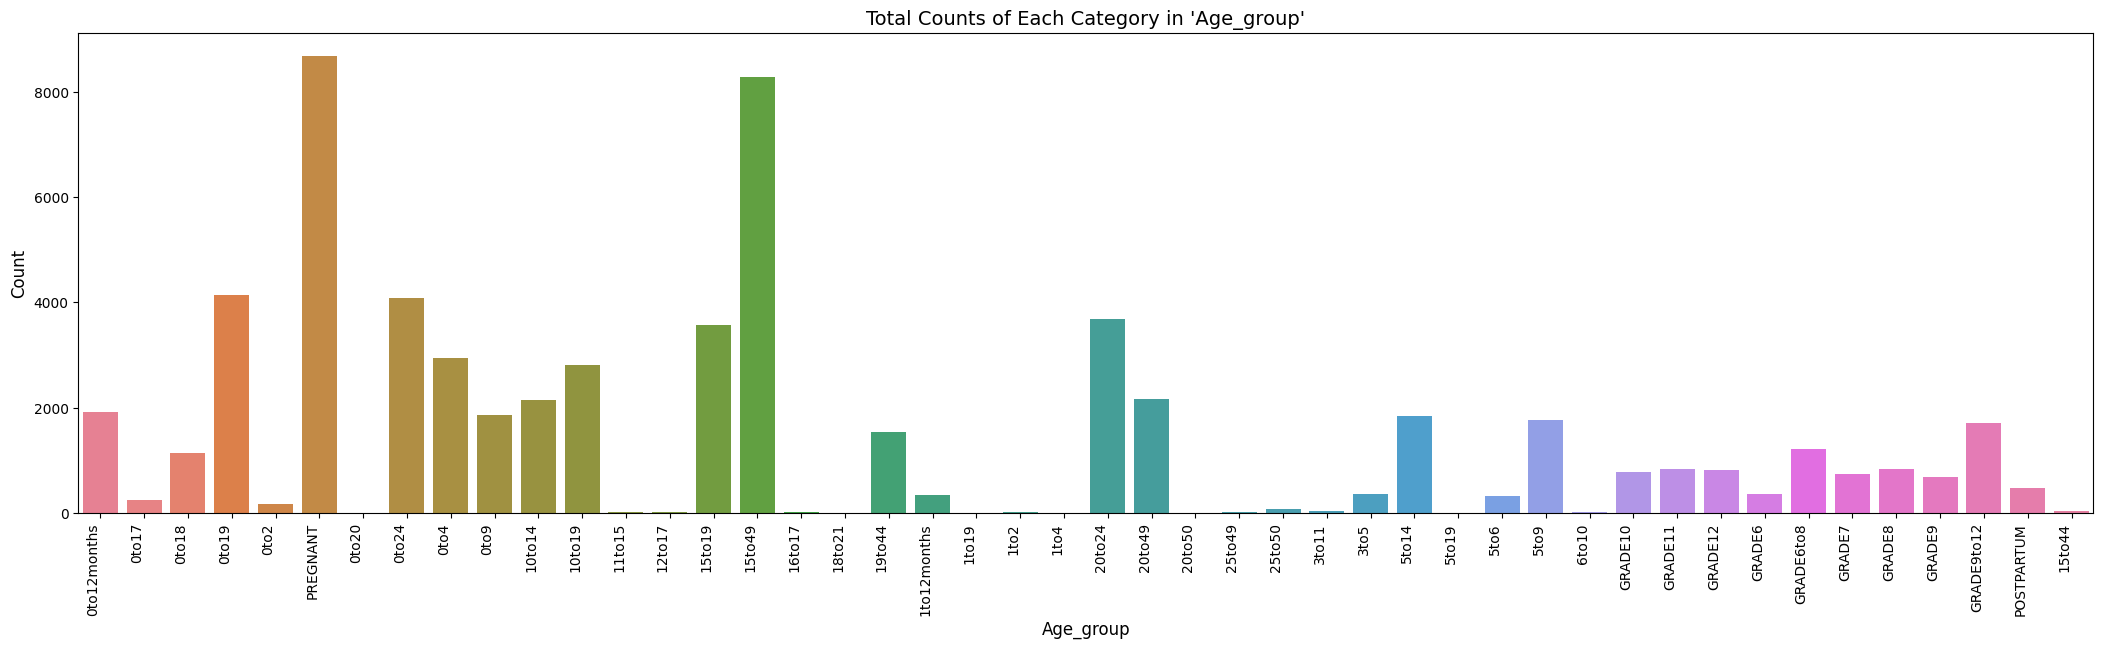

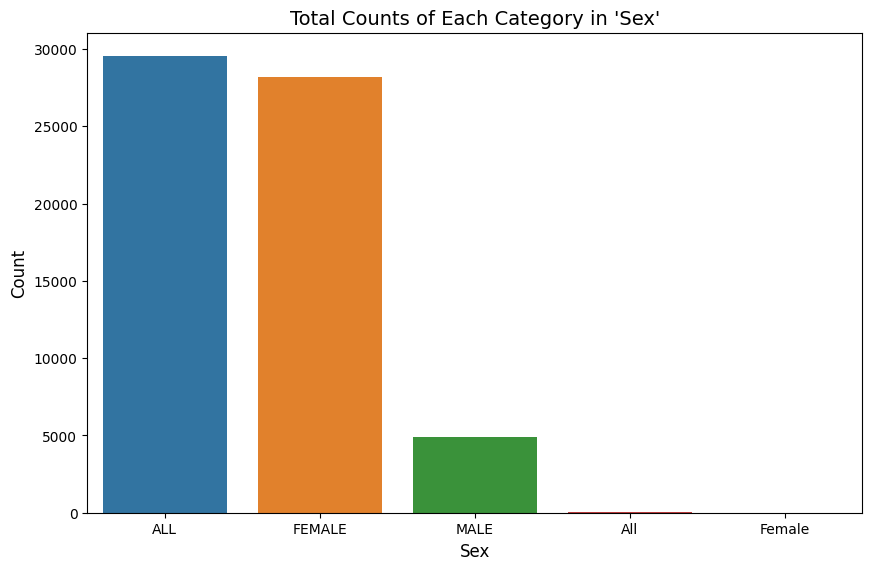

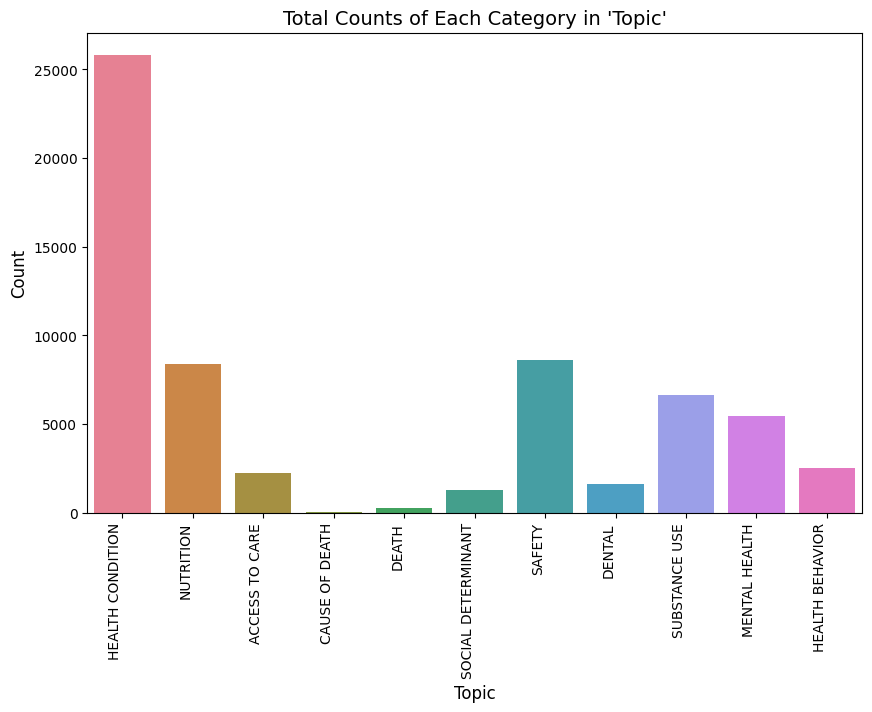

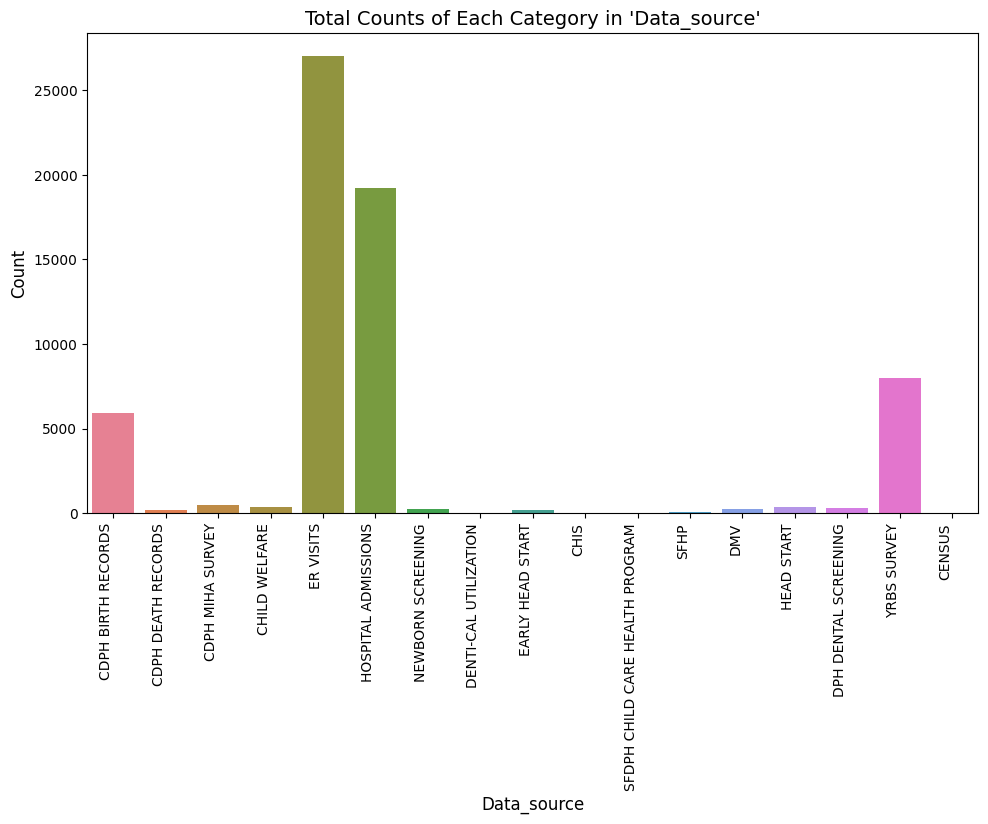

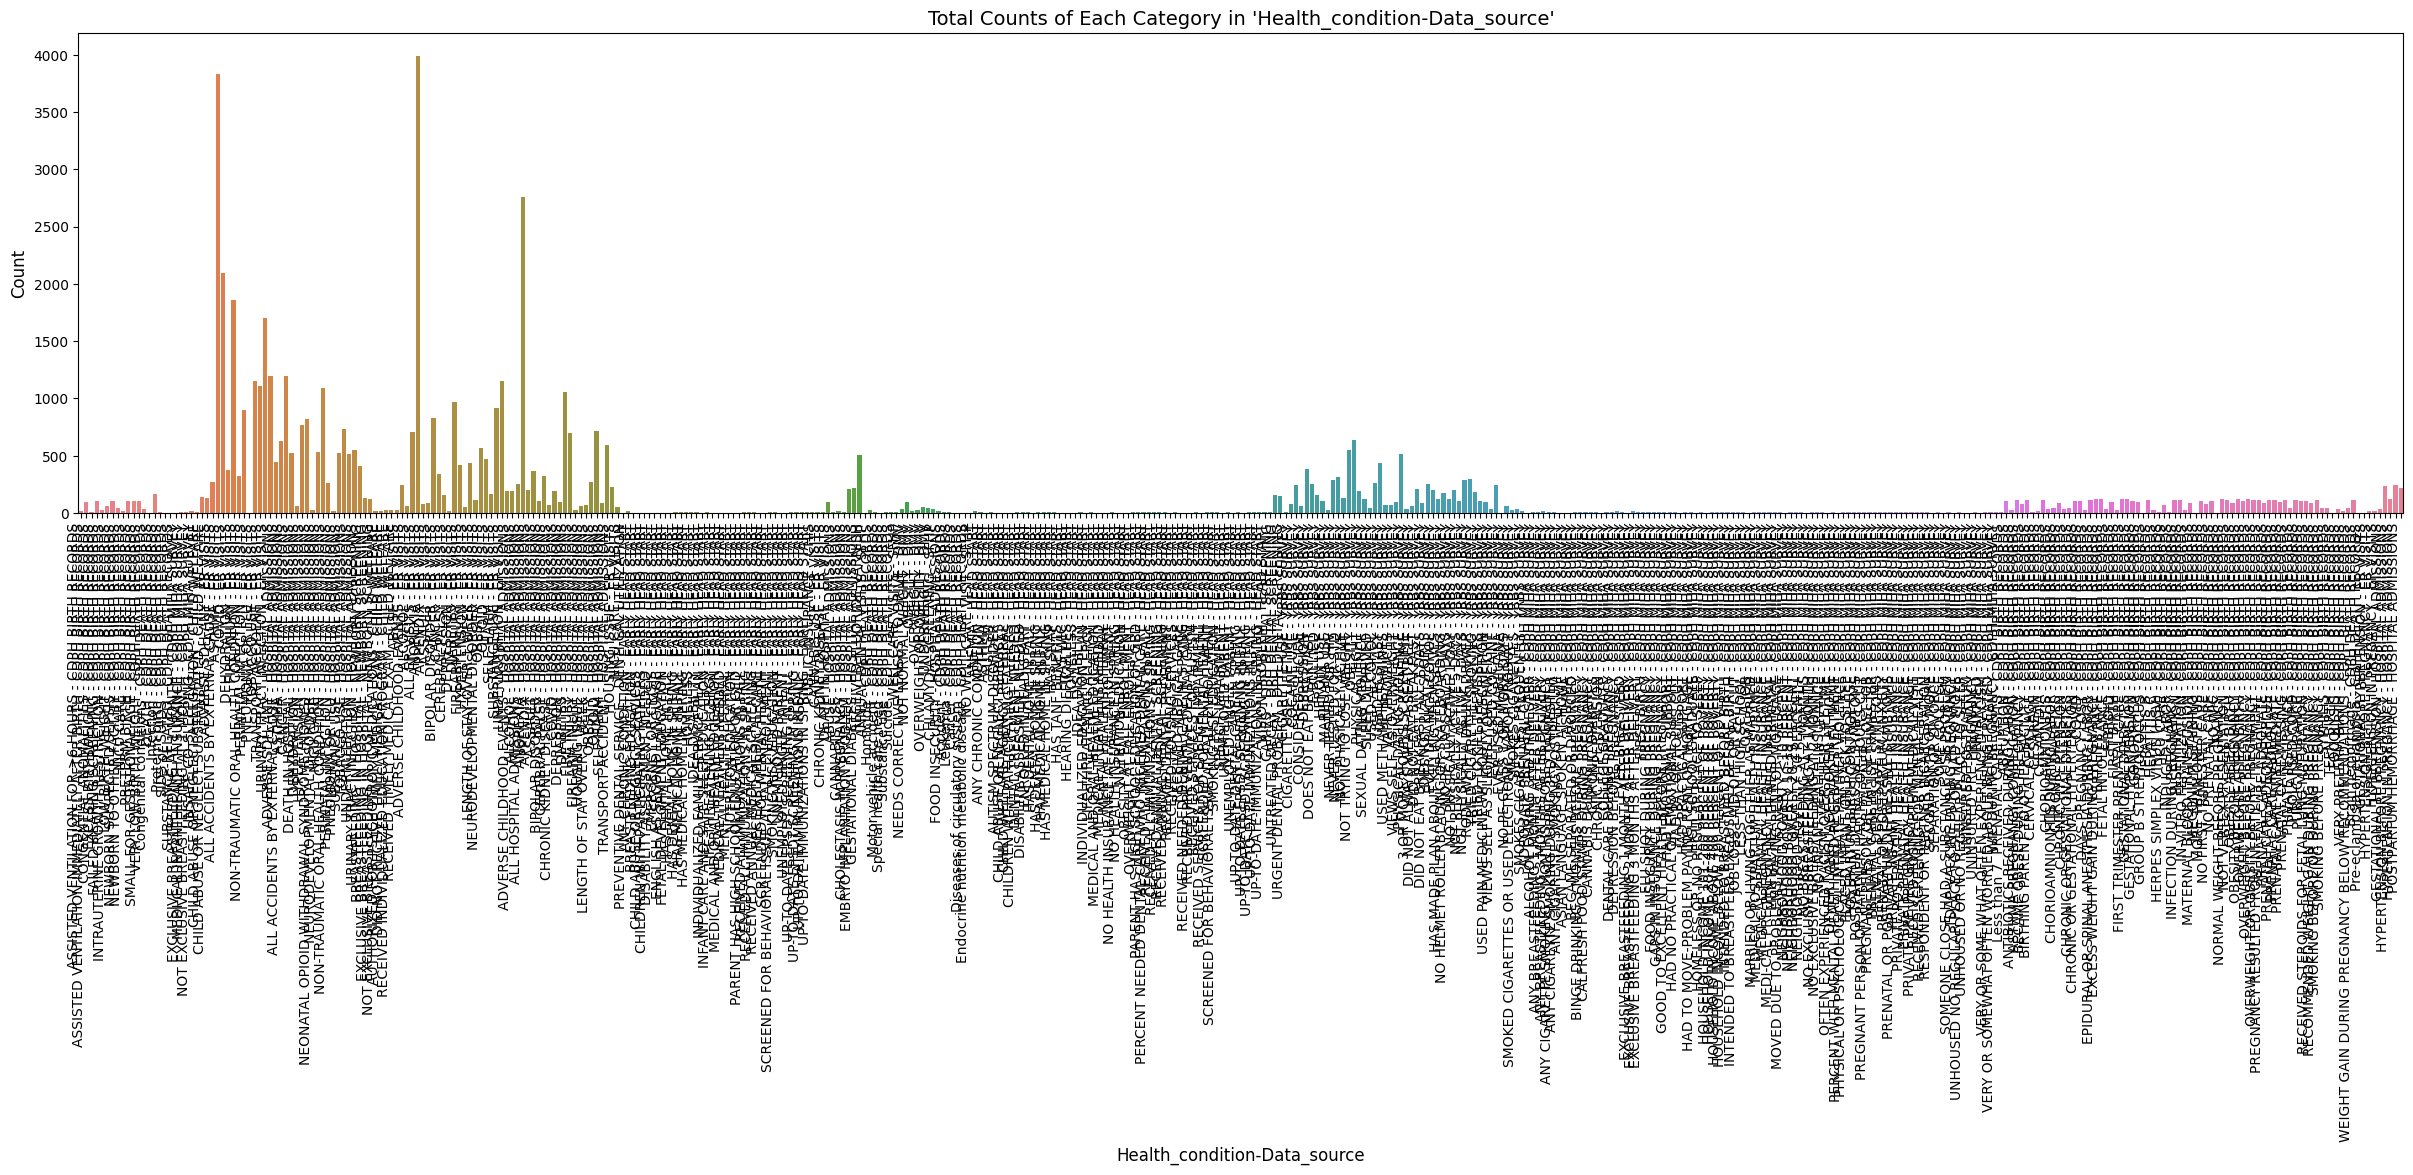

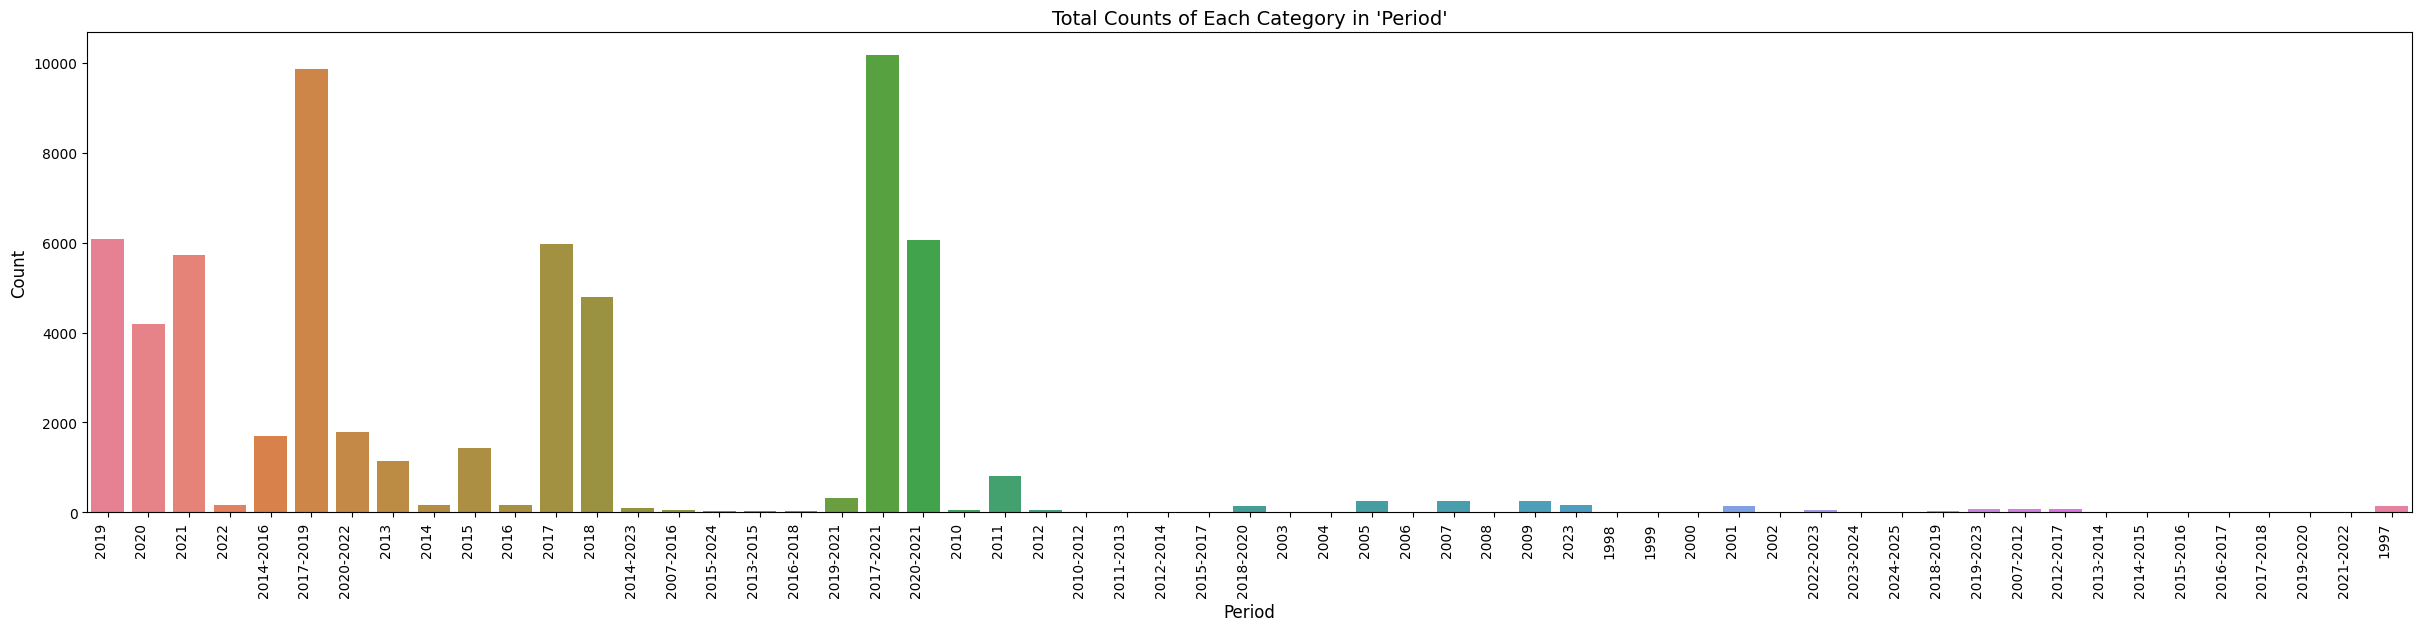

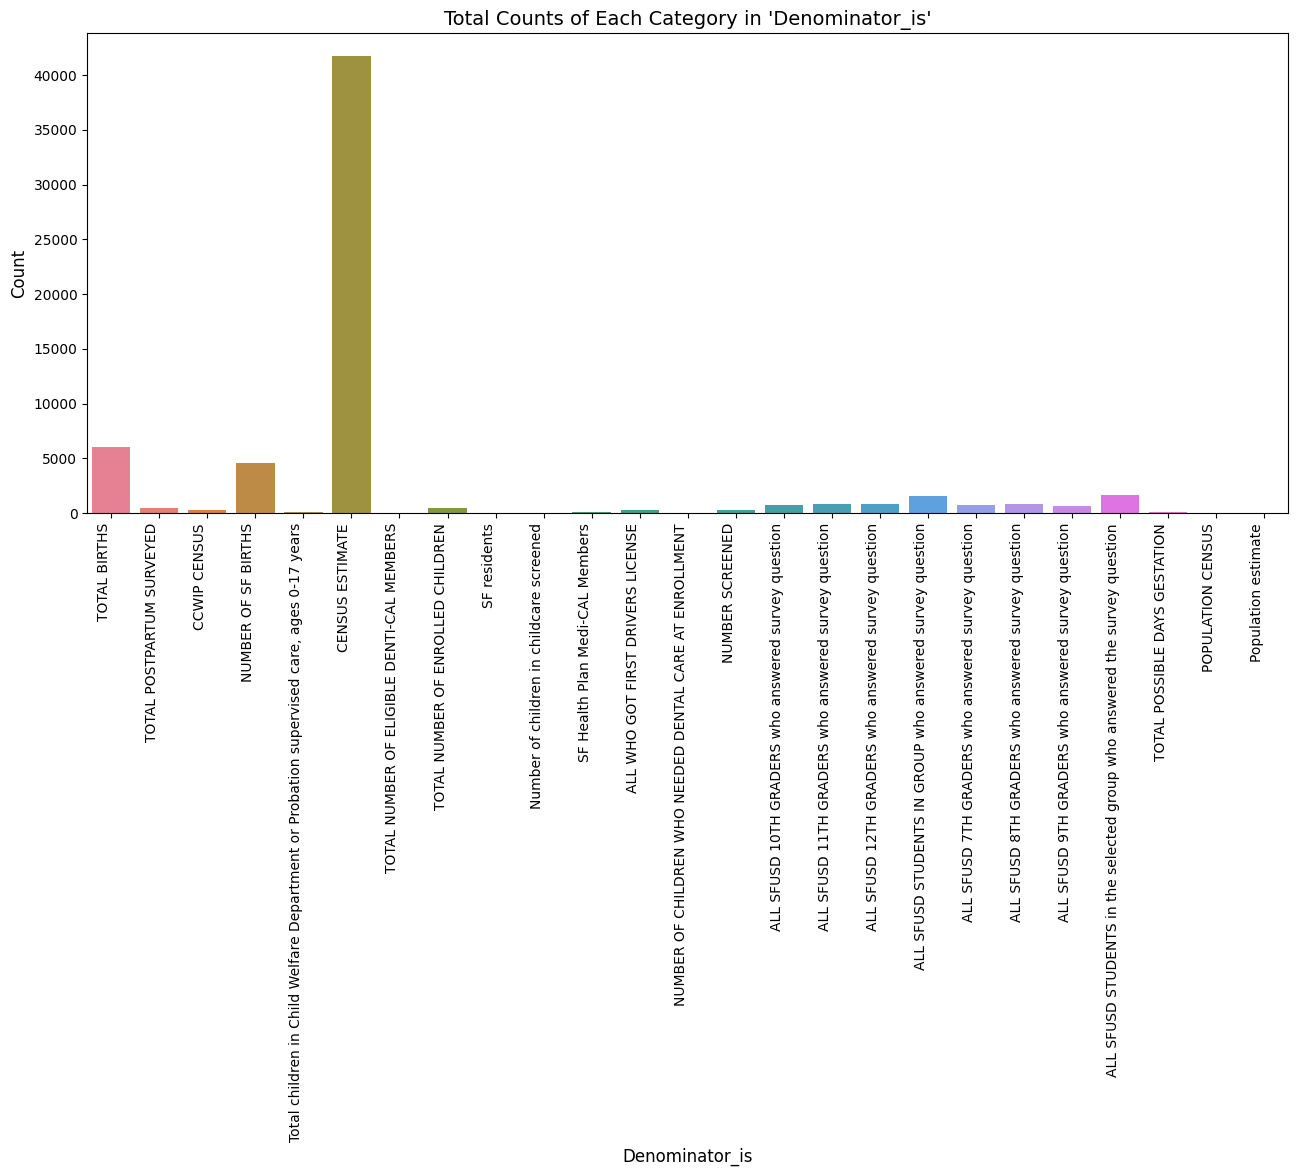

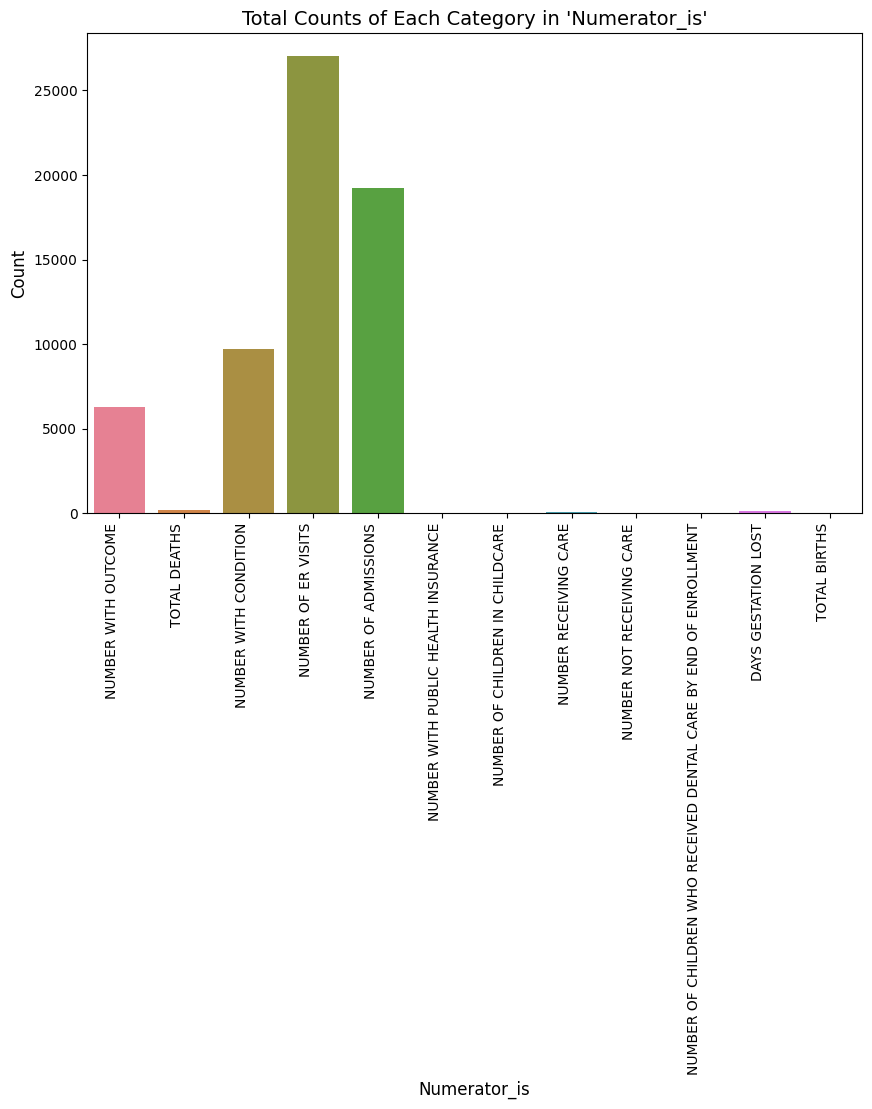

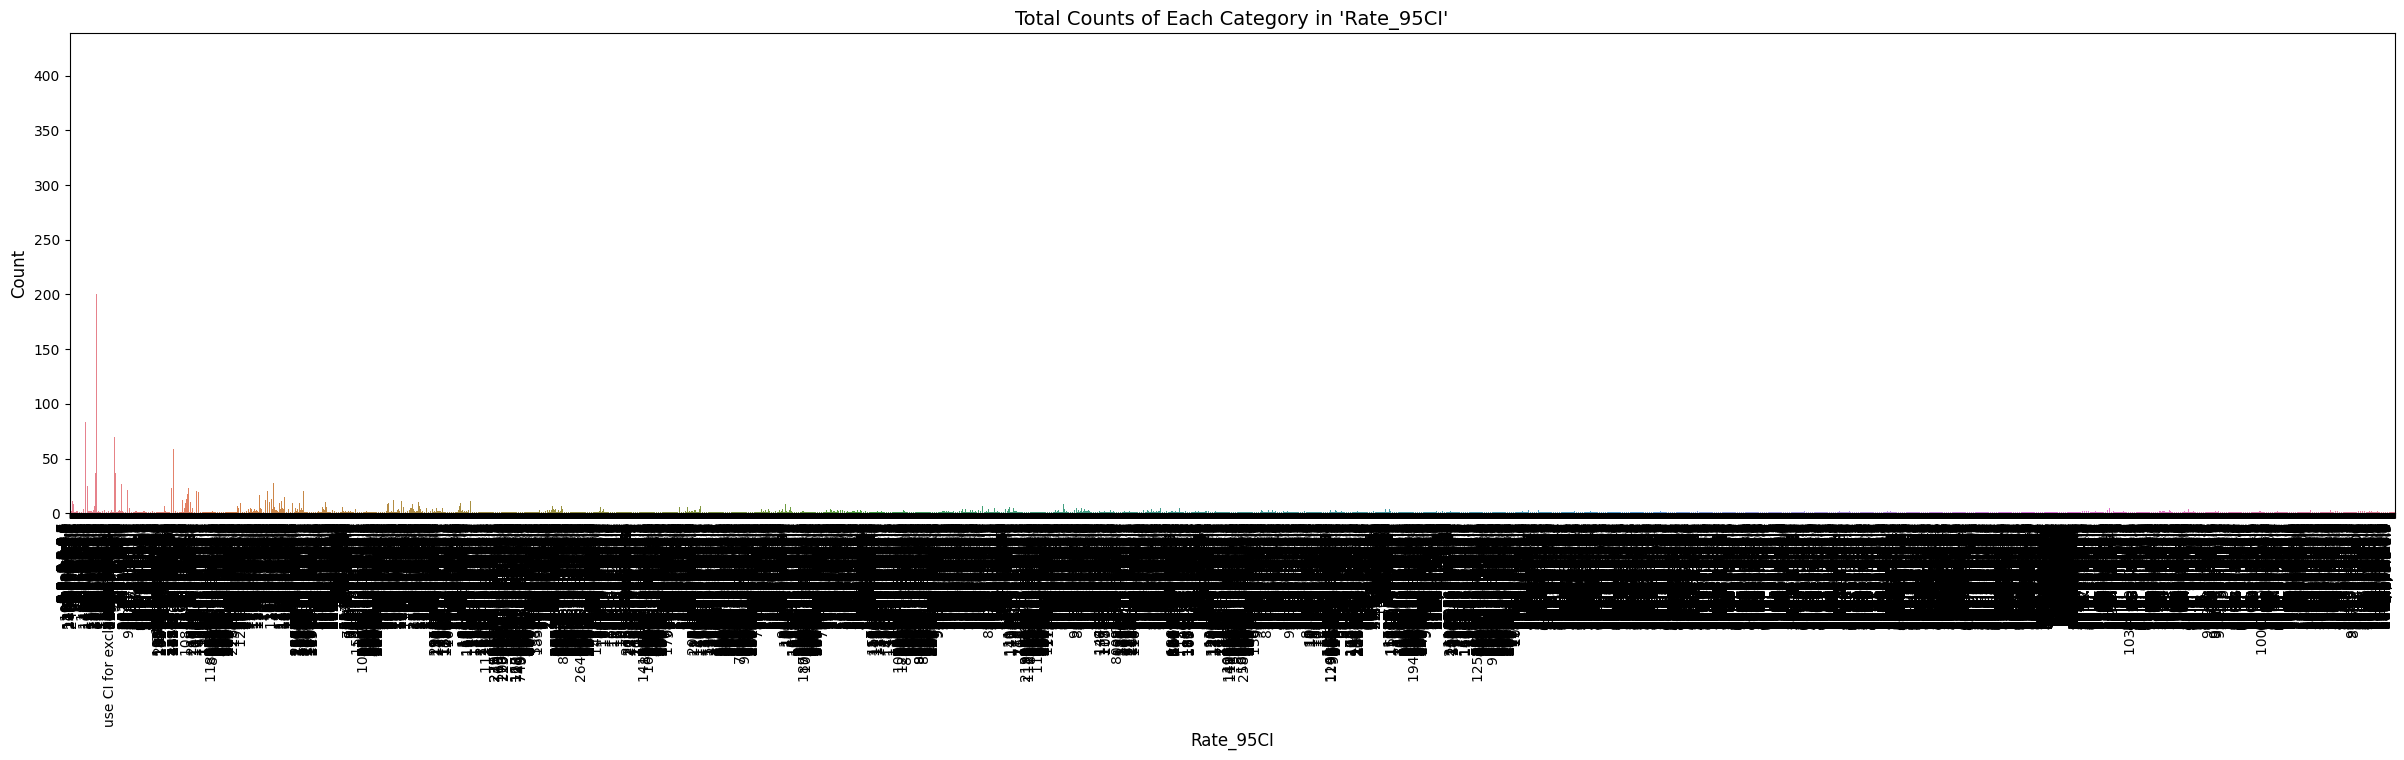

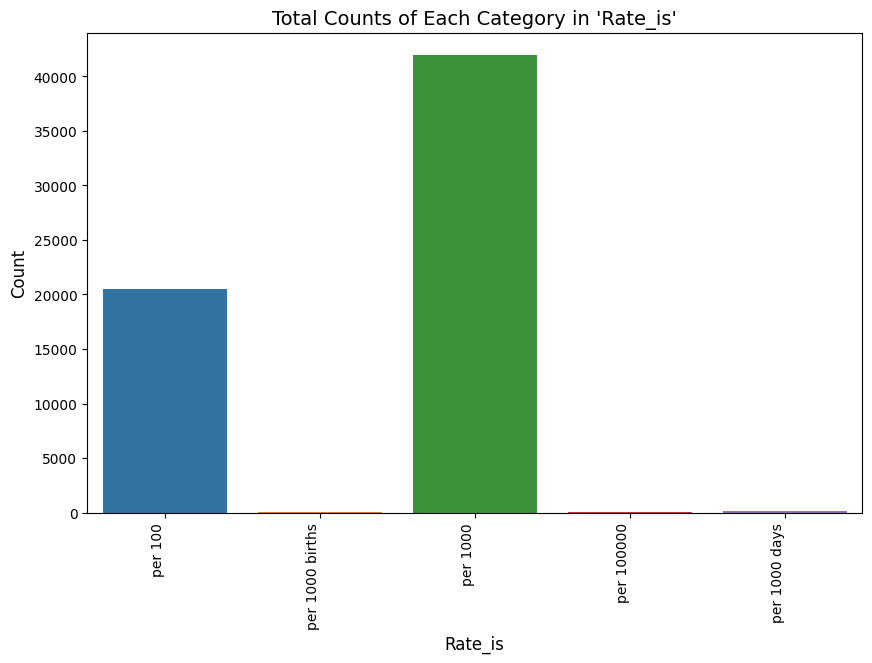

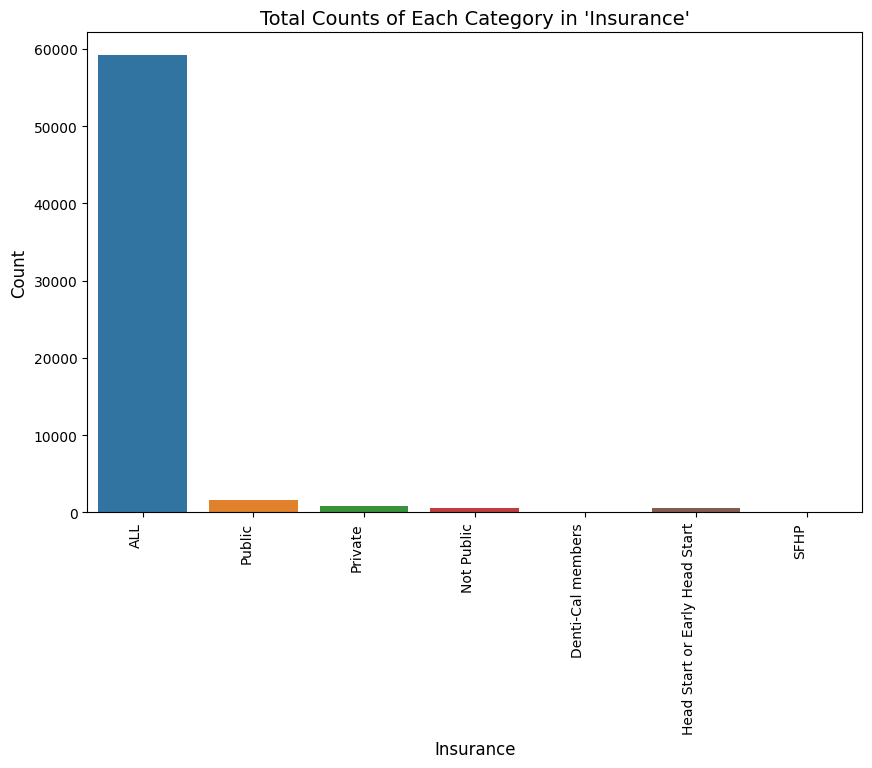

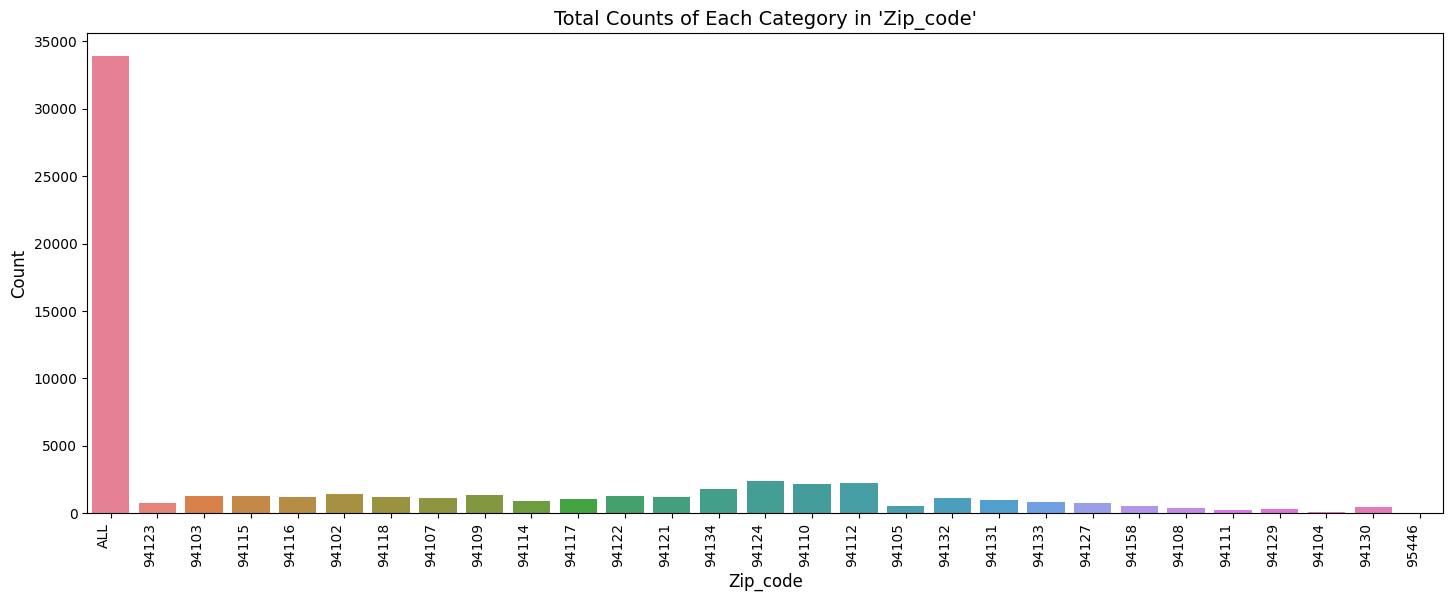

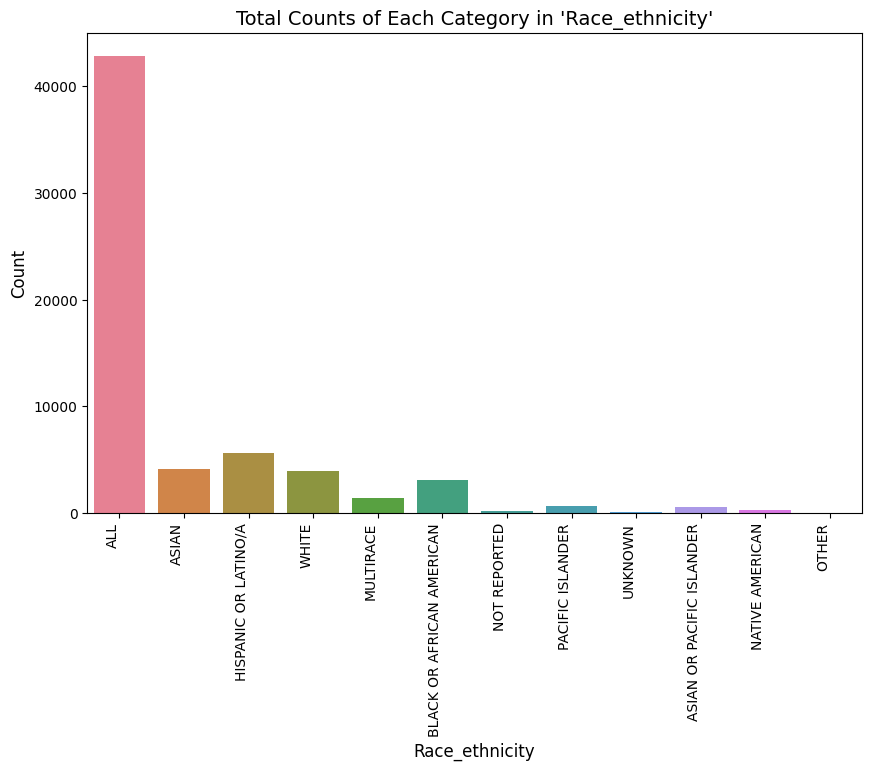

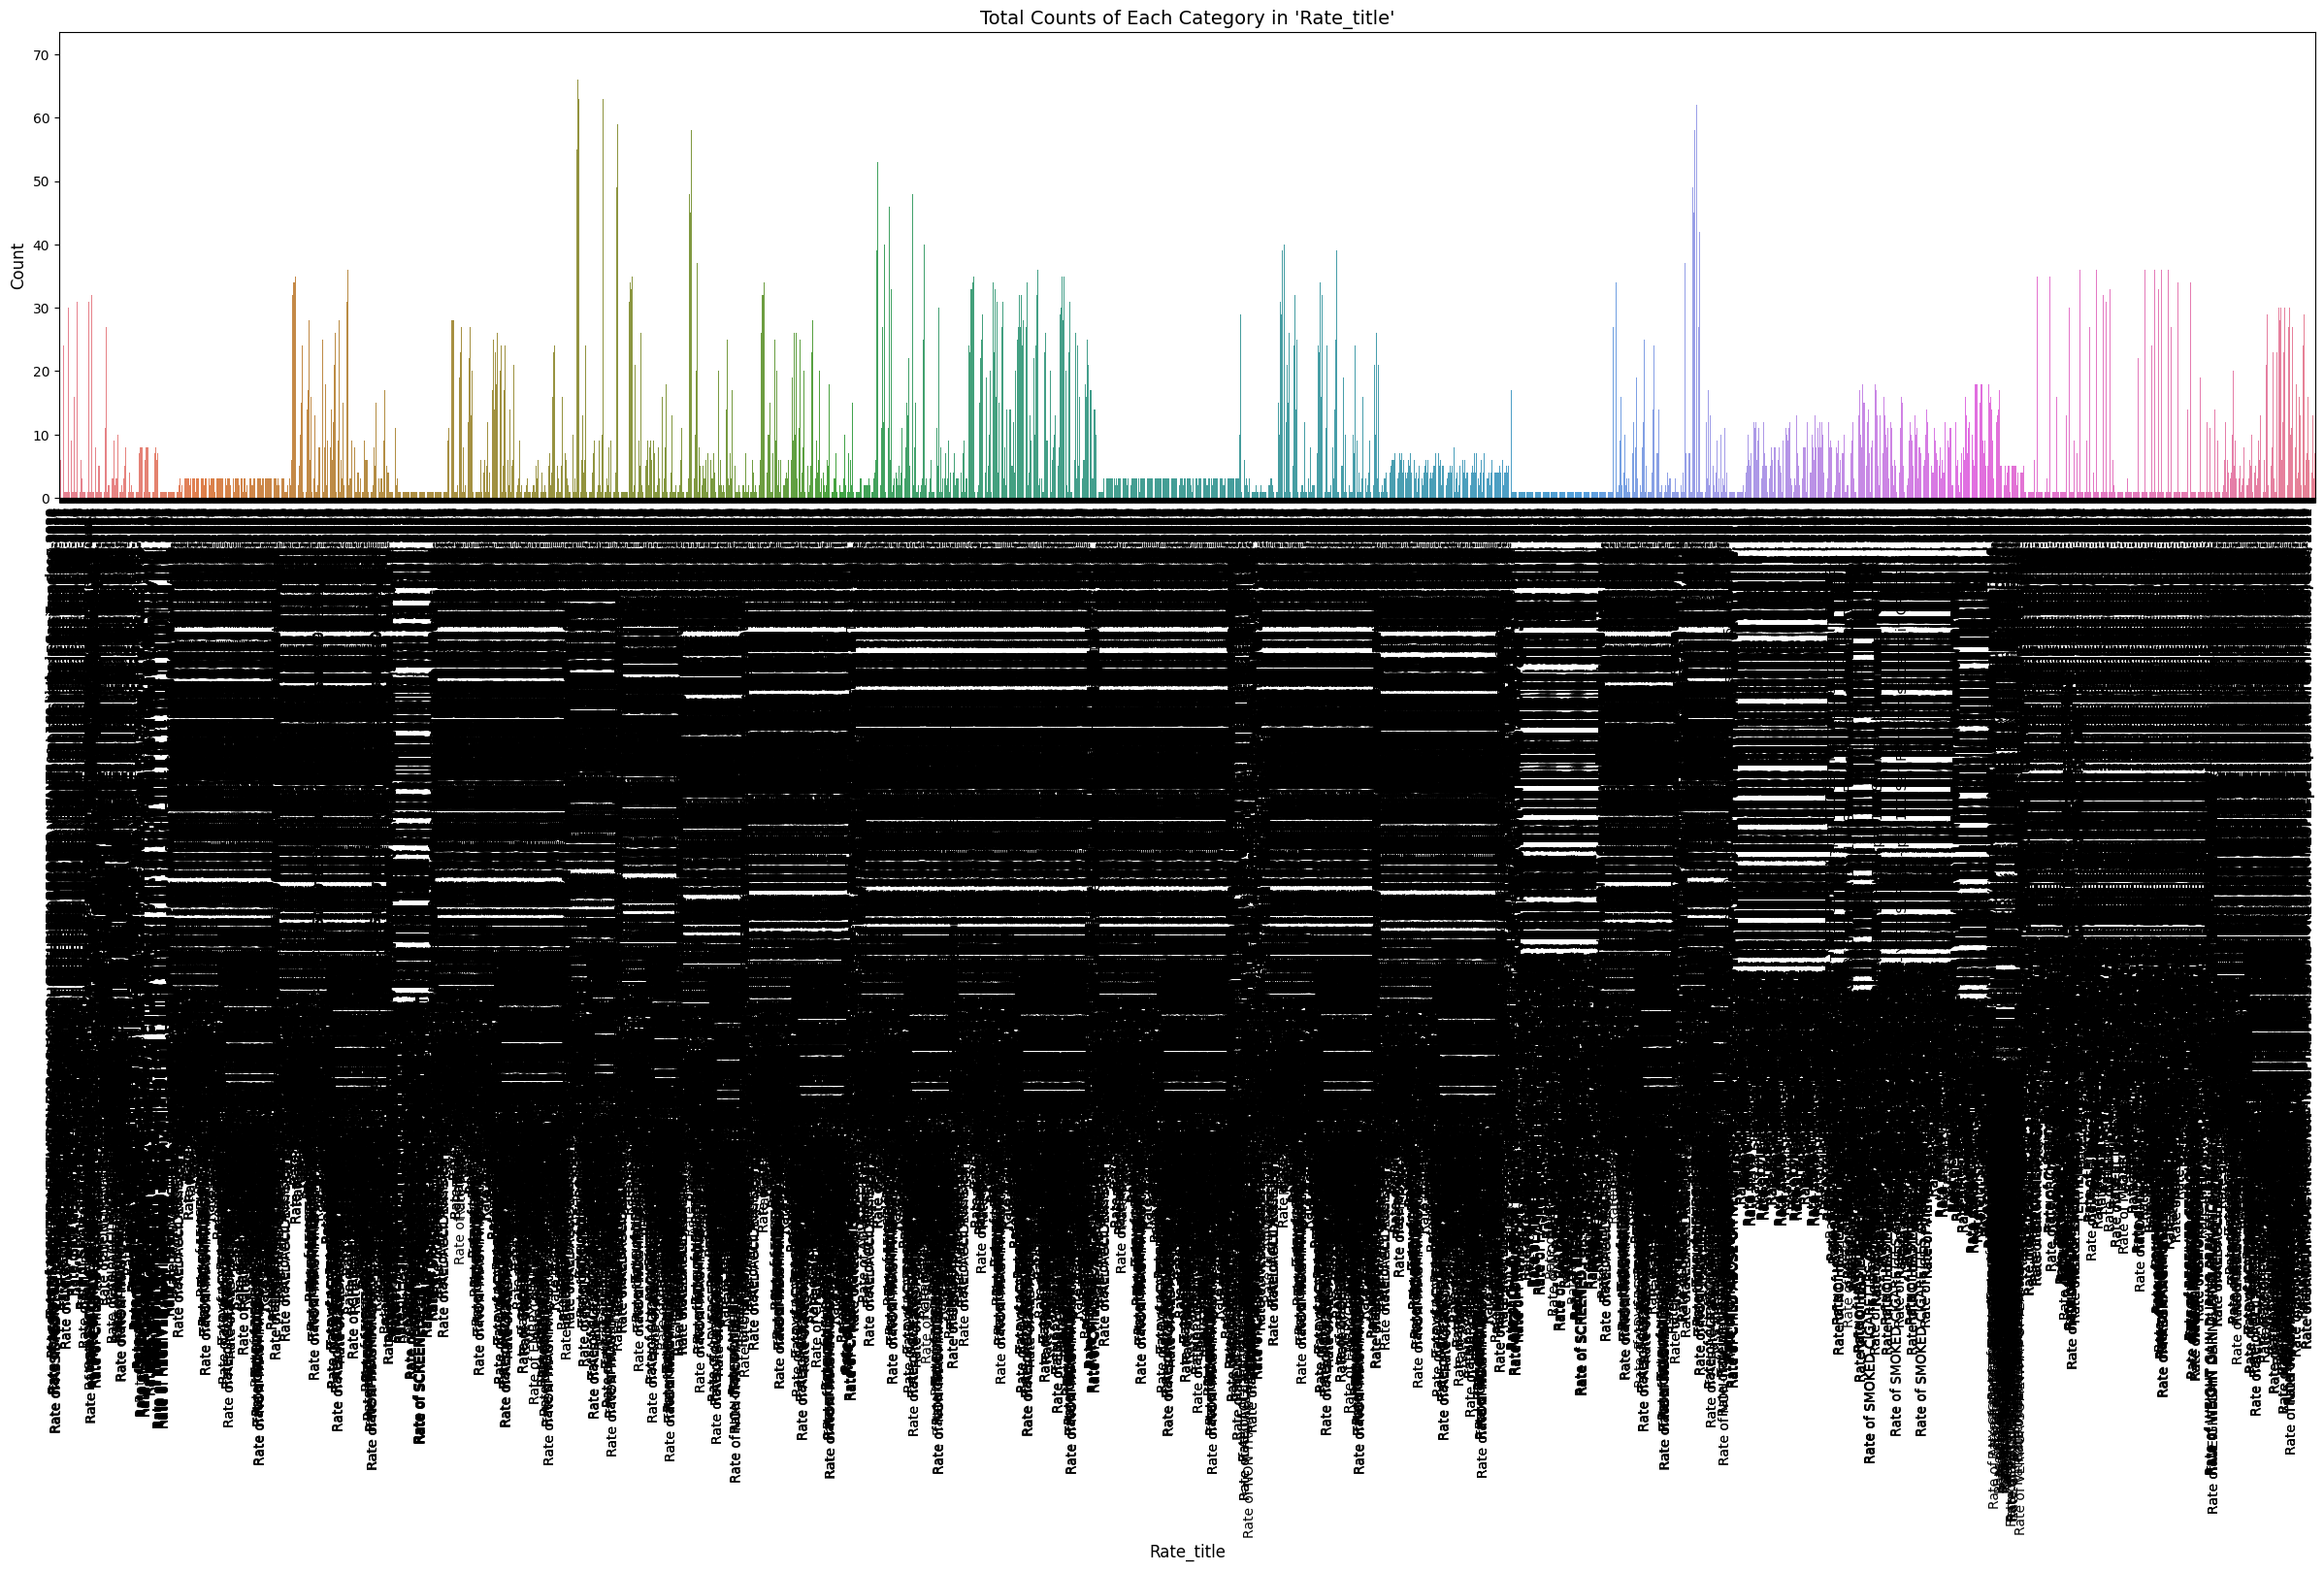

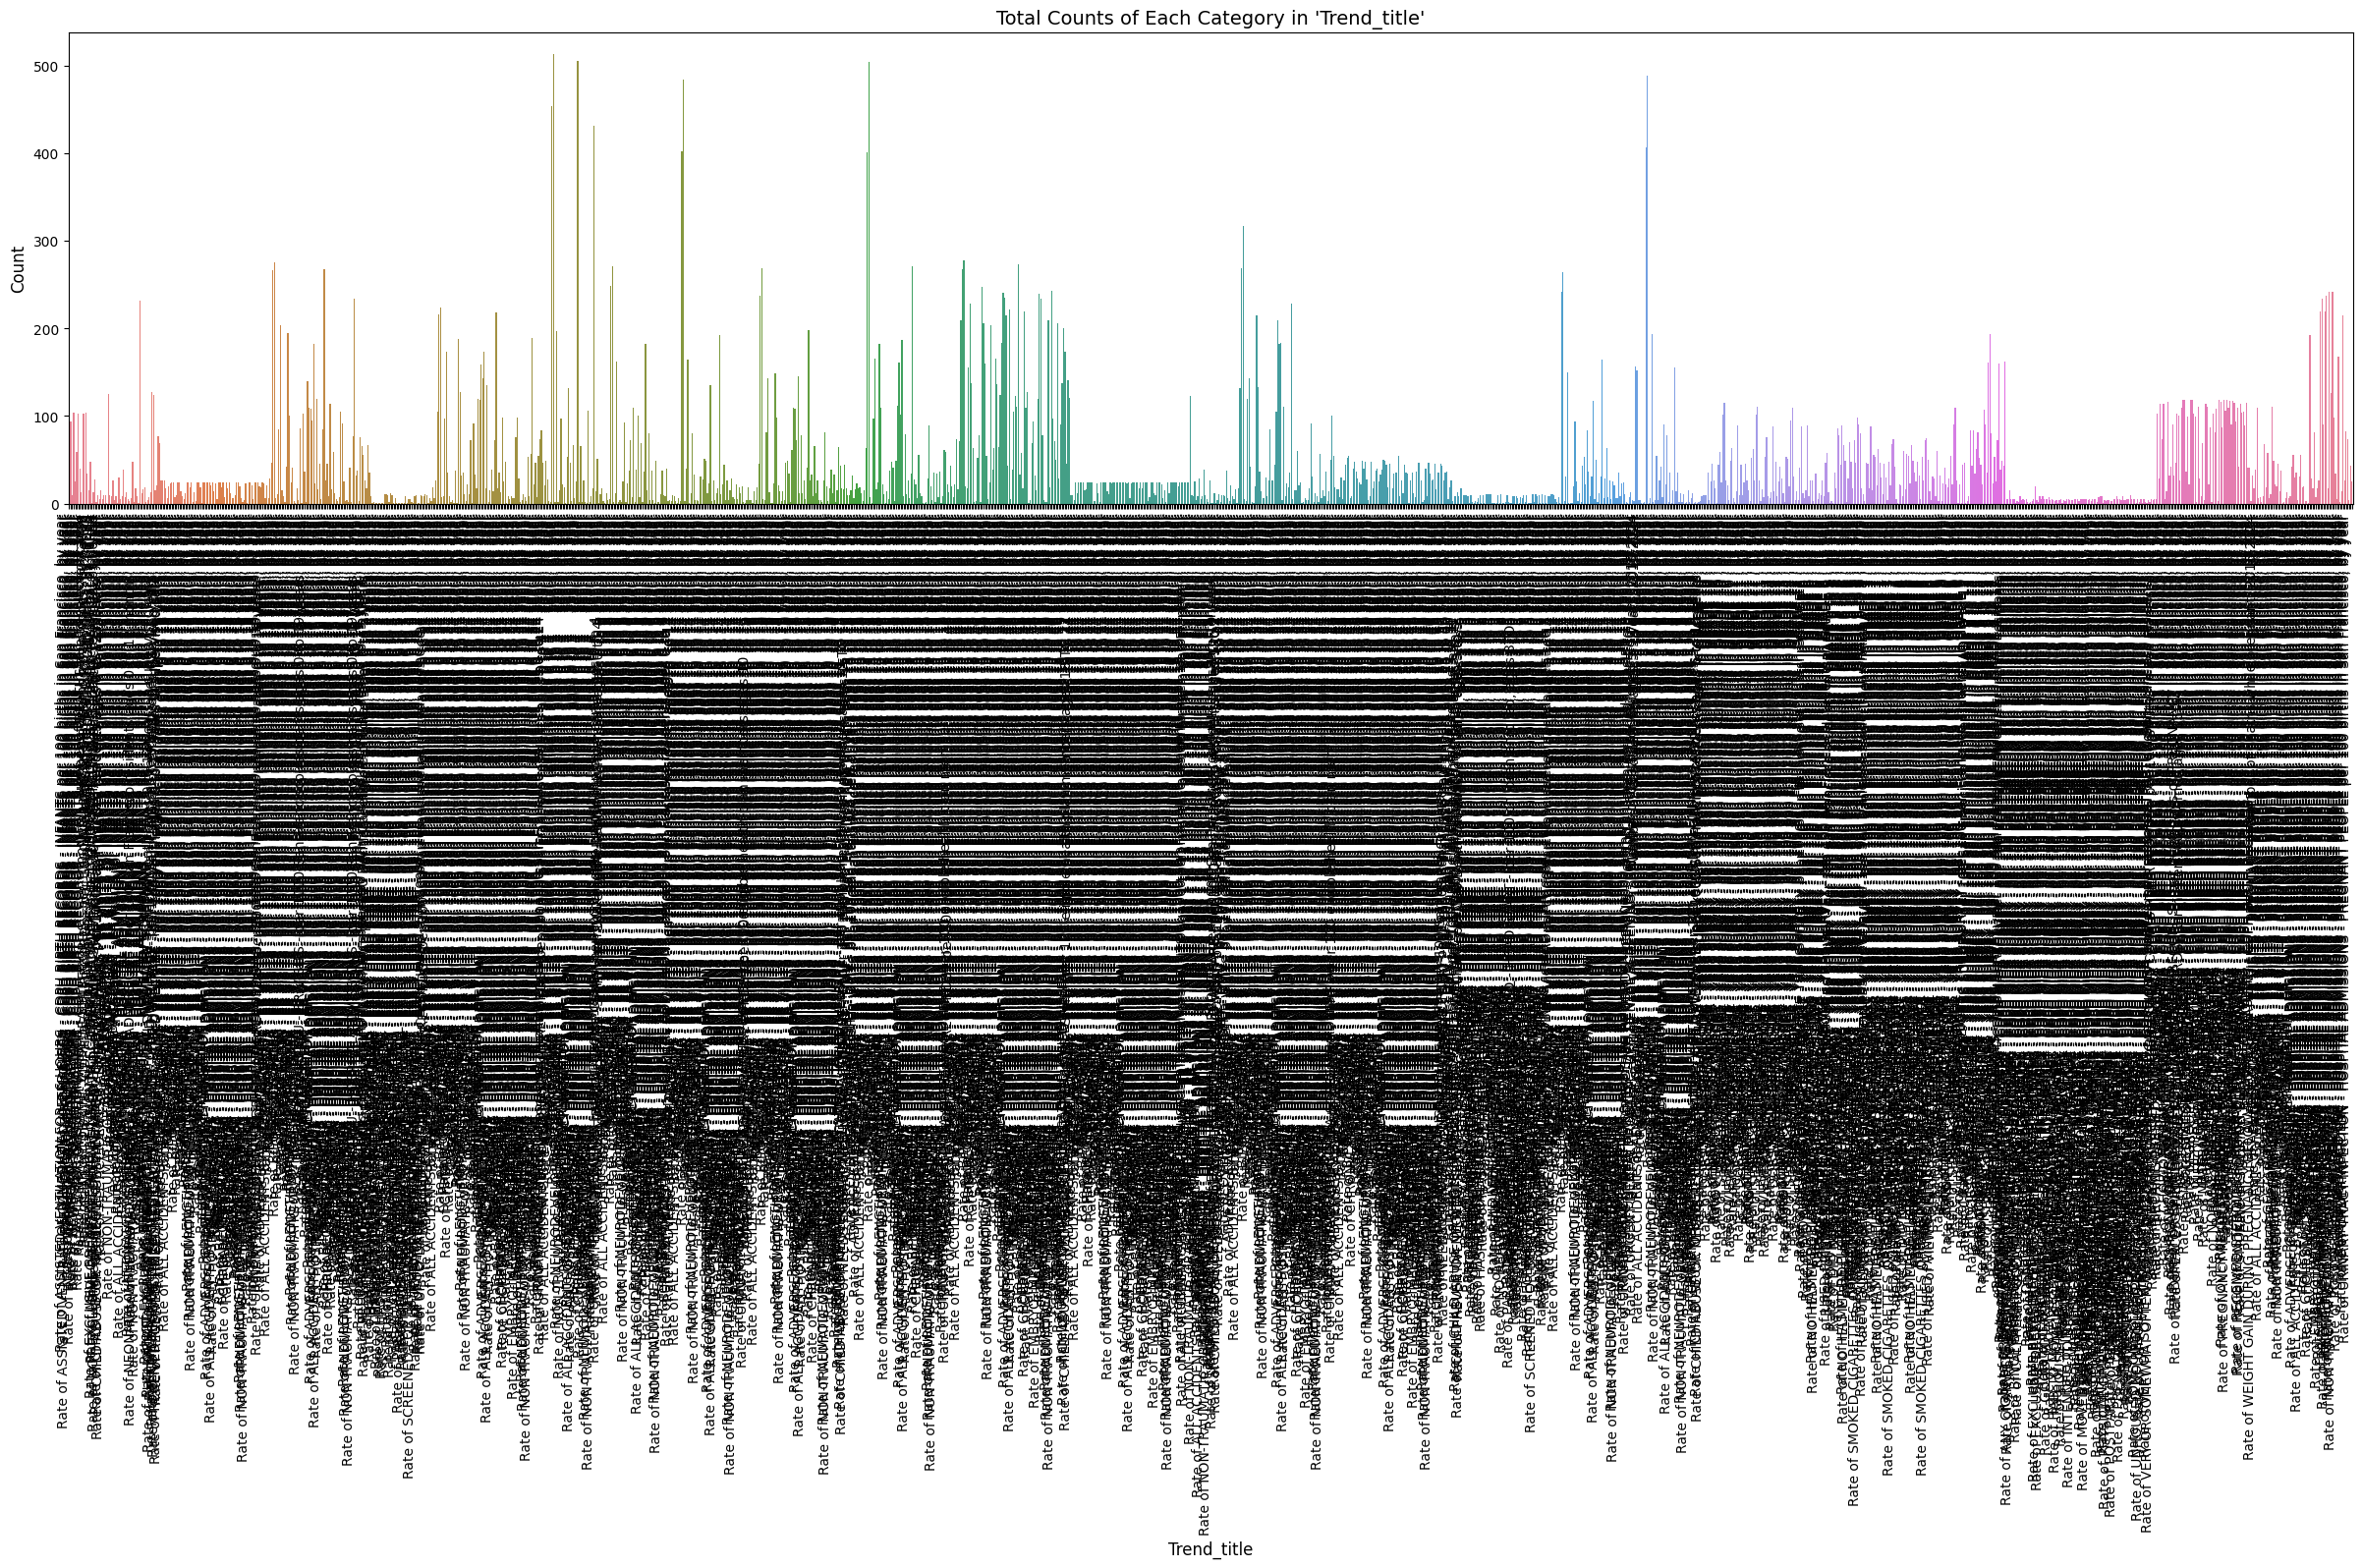

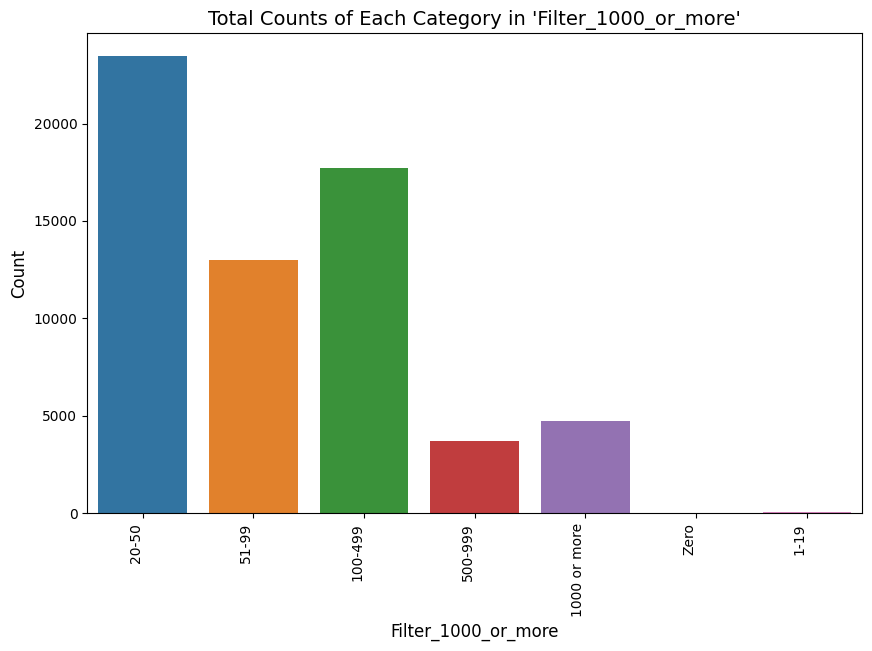

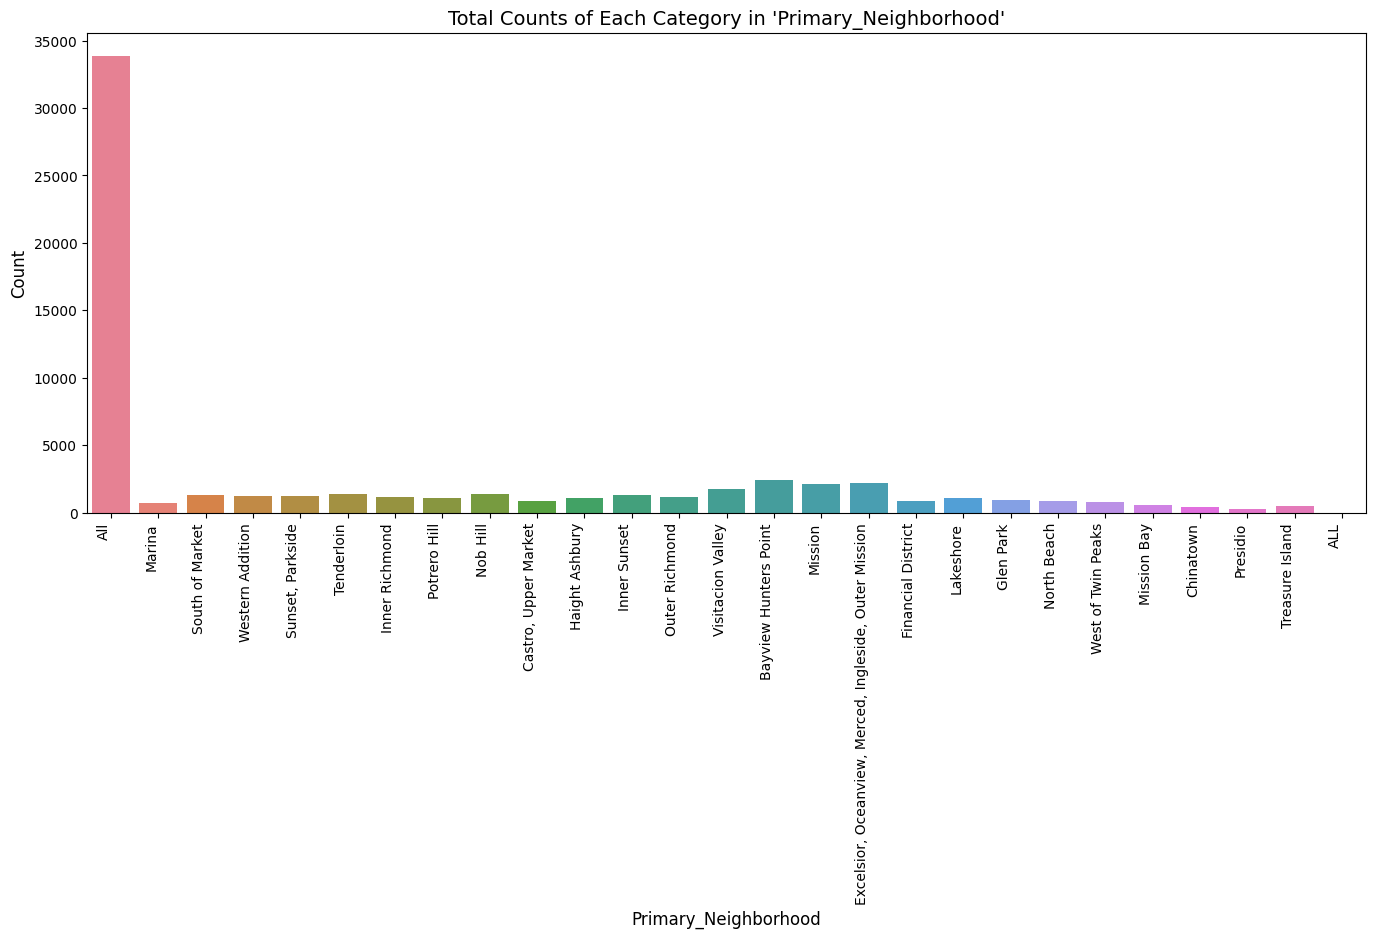

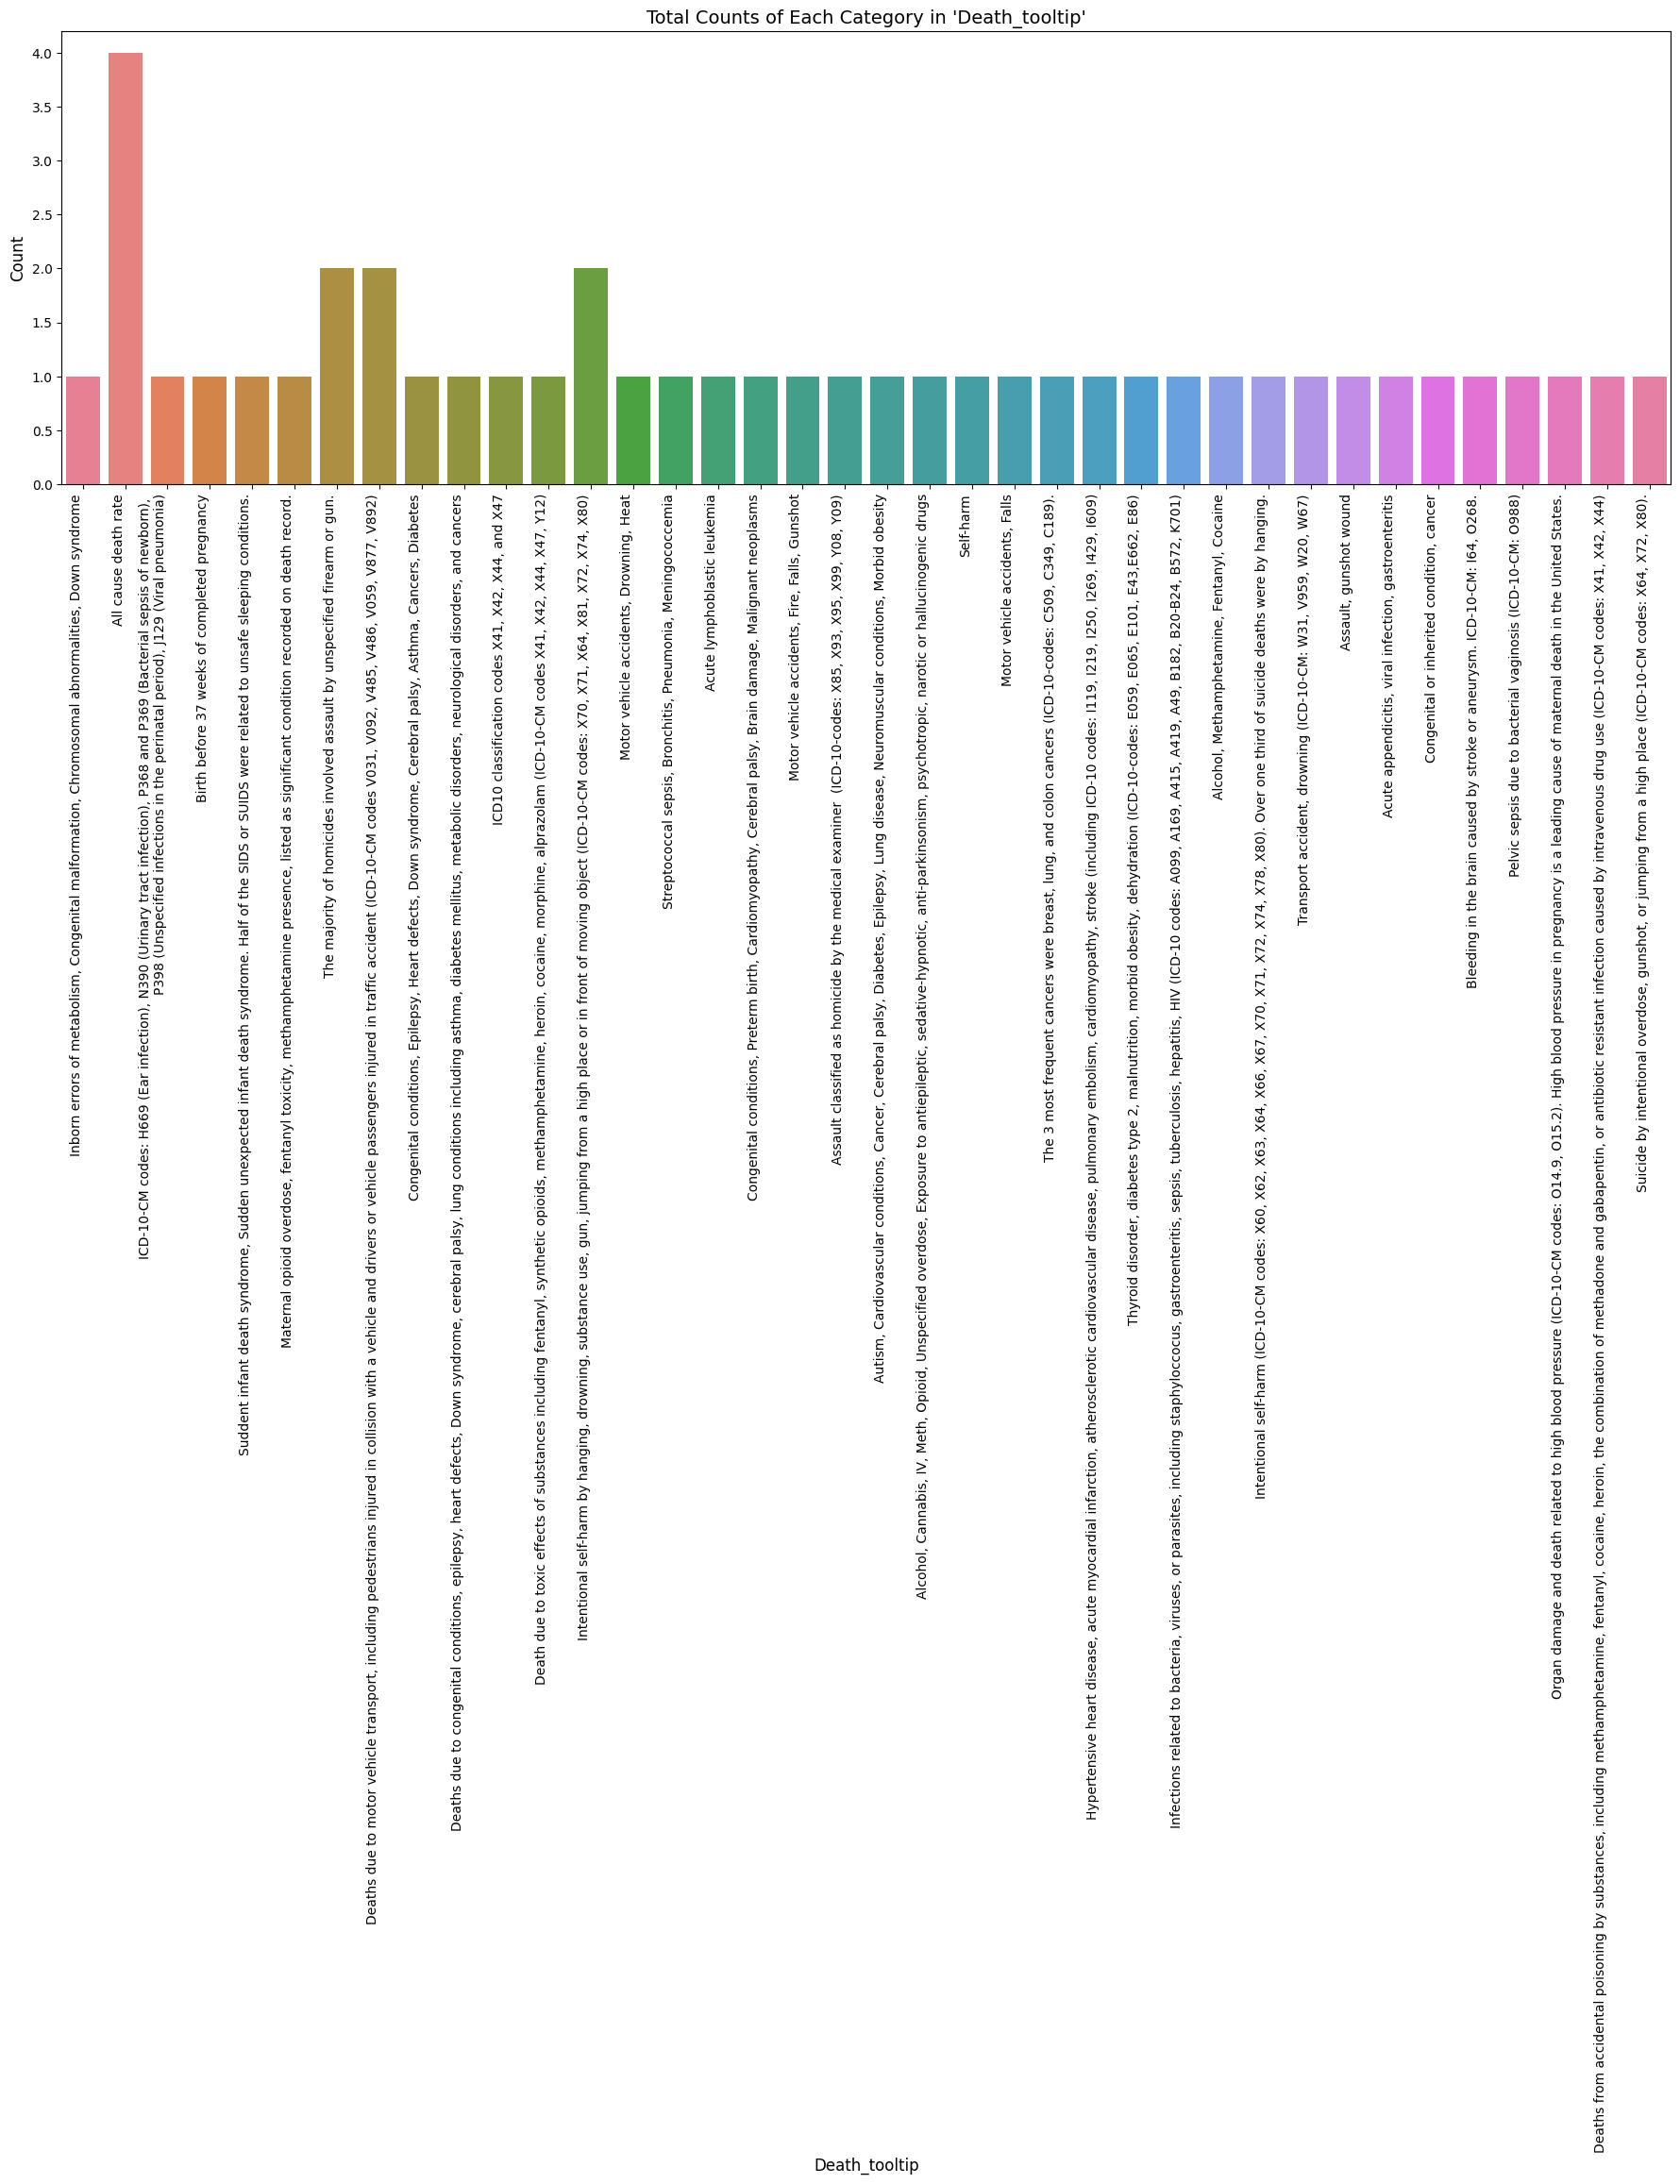

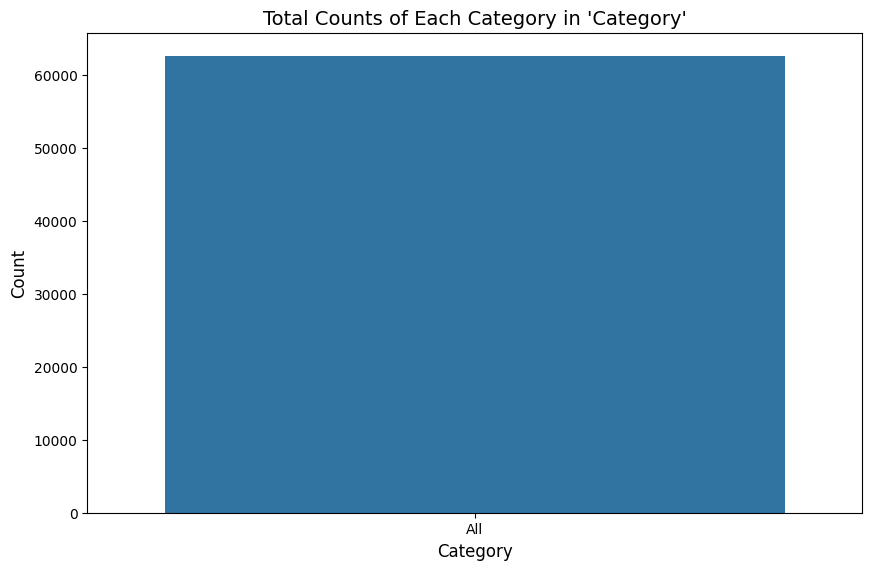

In [47]:
# Question 3: Draw a bar plot to indicate total counts of each categorical variable in a given column.

import matplotlib.pyplot as plt
import seaborn as sns

# Detect categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # Determine figure width dynamically
    num_categories = df[col].nunique()
    max_label_length = df[col].astype(str).map(len).max()
    fig_width = max(10, min(0.5 * num_categories + 3, 30))  # wider for many categories

    plt.figure(figsize=(fig_width,8))  # make figure taller too
    sns.countplot(
        data=df,
        x=col,
        hue=col,    # fixes future Seaborn warning
        dodge=False,
        legend=False
    )

    plt.title(f"Total Counts of Each Category in '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    # Rotate labels if they are long or many
    if max_label_length > 10 or num_categories > 10:
        plt.xticks(rotation=90, ha='right', fontsize=10)
    else:
        plt.xticks(fontsize=10)

    plt.subplots_adjust(bottom=0.3, top=0.9)  # ensures labels fit
    plt.show()



* My explanation:

Age_group:
The bar chart shows that the majority of records are concentrated in the 0to12months group, while older child or adolescent groups have far fewer records.This indicates that most of the dataset focuses on infants, which matches expectations for a maternal, child, and adolescent health dataset.
The distribution is highly skewed, not uniform.

Sex:
The counts for Male and Female are relatively balanced, with possibly a slight difference depending on the dataset.There are no extreme outliers in this column. This suggests the dataset captures both sexes adequately.

Topic:
If there is only one category like HEALTH CONDITION, the bar chart shows a single tall bar. This indicates that all records are categorized under the same topic, so there is no variation in this column.

Data_source:
The chart may show CDPH BIRTH RECORDS dominating the dataset, with few or no other sources.This informs us that the dataset primarily relies on one official data source, which can affect representativeness.

Health_condition-Data_source:
This column has many long categories. The bar chart shows which conditions are most frequently recorded.Some conditions have very high counts (e.g., ASSISTED VENTILATION FOR >6 HOURS) while others are rare, highlighting imbalances in the dataset.This helps identify which conditions have enough data for further statistical analysis.

Insurance, Primary_Neighborhood, Race_ethnicity:
The bar charts show the most common categories and reveal underrepresented groups.For example, if ALL dominates in Race_ethnicity, it indicates aggregated data. Rare categories may appear as very short bars, which could affect downstream analysis if category-specific trends are important.

In [49]:
# Question 4: Find means, medians, and modes.

# Detect numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through numeric columns
for col in numeric_cols:
    # Skip if column is empty
    if df[col].dropna().empty:
        continue

    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().values  # mode() can return multiple values

    print(f"\nColumn: {col}")
    print(f"Mean: {mean_val}")
    print(f"Median: {median_val}")
    print(f"Mode: {mode_val}")


Column: Year
Mean: 2017.8647401726987
Median: 2019.0
Mode: [2019.]

Column: Denominator
Mean: 42738.21491859386
Median: 7184.0
Mode: [1158.]

Column: Number_with_outcome
Mean: 461.82049132125377
Median: 74.0
Mode: [21.]

Column: Rate_SF_pop
Mean: 33.35622382763801
Median: 8.6
Mode: [0.3]

Column: CI_low
Mean: 28.574826013918887
Median: 6.7
Mode: [0.4]

Column: CI_high
Mean: 38.618764898808095
Median: 10.9
Mode: [0.5]

Column: Sort_1000_or_more
Mean: 5.24804668813981
Median: 5.0
Mode: [4]

Column: Cause of death rank
Mean: 3.0
Median: 3.0
Mode: [1. 2. 3.]

Column: Latest_data
Mean: 1.0
Median: 1.0
Mode: [1.]

Column: Unique_row_id
Mean: 31357.5
Median: 31357.5
Mode: [    1     2     3 ... 62712 62713 62714]


* My explanation:

-Year

Mean: 2017.86, Median: 2019, Mode: 2019
Most data points are concentrated around 2019.
The mean is slightly lower than the median because earlier years (2014–2016) lower the average slightly.
No extreme outliers — distribution is slightly left-skewed.

-Denominator (Total births or total population)
Mean: 42,738, Median: 7,184, Mode: 1,158
The mean is much higher than the median, indicating a right-skewed distribution a few large denominators inflate the mean.Most records are for smaller population groups, as reflected in the low mode.

-Number_with_outcome
Mean: 461.8, Median: 74, Mode: 21
Highly right-skewed: most health outcomes involve small numbers, but some records have very high counts, increasing the mean.
Outliers are present in a few large hospitals or aggregated areas.

-Rate_SF_pop (Rate per 100,000 population)
Mean: 33.36, Median: 8.6, Mode: 0.3
Strong right-skew: most rates are low, but a few extreme cases push the mean up.
Median and mode are closer to the typical rates, showing that most outcomes are rare.

-CI_low and CI_high (Confidence intervals)
Both mean > median > mode, confirming right-skewed distributions.
Indicates that most rates are low, but upper bounds of some intervals are very high.

-Sort_1000_or_more
Mean: 5.25, Median: 5, Mode: 4
Small differences between mean, median, and mode suggest a fairly symmetric distribution.Cause of death rank
Mean = Median = 3, Mode: [1, 2, 3]
Very few records exist for this column, and multiple modes reflect equal ranking of top causes.

-Latest_data
All values are 1 — the column is constant, so no variability is present.

-Unique_row_id
Mean = Median = 31,357.5, Mode: all IDs
As expected, each row has a unique ID, so the mode includes all IDs.
Not meaningful for analysis.it is just an identifier.

Overall, the dataset contains outliers in several numeric columns, and medians are more representative of typical values than means.

* CONCLUSION:

* 1) Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If they are not useable, find some new data!

The data are generally what I expected for maternal, child, and adolescent health outcomes. Numeric variables like Denominator, Number_with_outcome, and Rate_SF_pop are highly skewed, with most records at lower values and a few extreme high values. Categorical variables such as Age_group, Sex, and Health_condition show clear groupings. The data are usable for analysis and visualization, although extreme values may need consideration for certain statistical methods. Overall, the dataset is suitable for exploring distributions, group comparisons, and population trends.

* 2) What is the overall shape of the distribution? Is it normal, skewed, bimodal, uniform, etc.?

Most numeric columns are right-skewed, meaning that the majority of values are low, but there is a long tail of higher values. No columns appear normal, uniform, or clearly bimodal.

* 3) Are there any outliers present? (Data points that are far from the others.)

Yes, there are outliers present in several numeric columns. For instance, in Denominator and Number_with_outcome, most values are relatively low, but a few records show exceptionally high counts that lie far from the main cluster of data. Similarly, Rate_SF_pop exhibits extreme high values, creating long tails in histograms and violin plots. These outliers reflect rare but real occurrences in the population and should be considered carefully, especially when performing statistical analyses, as they can influence mean values and skew the overall distribution. Detecting and understanding these outliers is essential for interpreting population-level trends accurately.

* 4) If there are multiple related histograms, how does the distribution change across different groups?

When comparing multiple related histograms, such as Rate_SF_pop grouped by Sex or Age_group, the overall shape of the distribution remains right-skewed across all groups. However, subtle differences are visible: some groups have longer tails, indicating that a small subset of individuals or events has substantially higher rates. For example, one sex or age group may have slightly higher counts in the upper range, while most values remain low. These differences suggest that although the general trend is similar across categories, specific subgroups may experience higher health outcome rates, highlighting the importance of analyzing data within group contexts rather than relying solely on aggregate statistics.

* 5) What are the minimum and maximum values represented in each histogram?

The minimum and maximum values vary depending on the numeric variable being analyzed. For example:

. Year: ranges from 2014 to 2022, reflecting the period of data collection.

. Denominator: ranges from approximately 1,158 to over 450,000, showing that most birth records or population counts are small, with a few very large observations.

. Number_with_outcome: ranges from 21 to over 10,000, indicating that most outcomes occur in smaller counts, while some rare events are extremely high.

. Rate_SF_pop: ranges from 0.3 to above 100, demonstrating that most rates are low, with a small proportion of high-rate observations.

. Cause of death rank: has a limited integer range (1–3), reflecting categorical ranking rather than continuous variation.

These minimum and maximum values help identify the spread and potential extreme observations within each variable, providing context for understanding the distribution and for detecting outliers.

* 6) How do bin sizes affect the histogram? Does changing the bin width reveal different patterns in the data?

Bin size has a significant impact on how the distribution is visualized. Using smaller bins provides a more detailed view, showing clusters, gaps, and subtle variations in the data, which can make skewness and minor peaks more apparent. Larger bins, on the other hand, smooth the histogram, emphasizing general trends while potentially masking smaller patterns and outliers. In the context of this dataset, adjusting the bin width can reveal different aspects of numeric variables such as Rate_SF_pop or Number_with_outcome: smaller bins highlight the concentration of most data points at lower values and the presence of extreme high values, whereas larger bins provide a clearer overall shape of the right-skewed distribution. Therefore, selecting an appropriate bin width is essential for accurately interpreting the data.

* 7) Does the distribution appear normal, or does it have a different distribution?

The distributions of the numeric variables in this dataset do not appear normal. Most variables, including Rate_SF_pop, Number_with_outcome, and Denominator, exhibit a right-skewed distribution, where the majority of values are concentrated at lower ranges with a long tail extending toward higher values. This indicates that most observations are relatively small, while a few extreme values occur much higher than the rest, consistent with the presence of outliers. The distributions are clearly non-uniform and unimodal but heavily skewed, which should be considered when performing statistical analyses or modeling, as normality assumptions would not hold for these variables.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

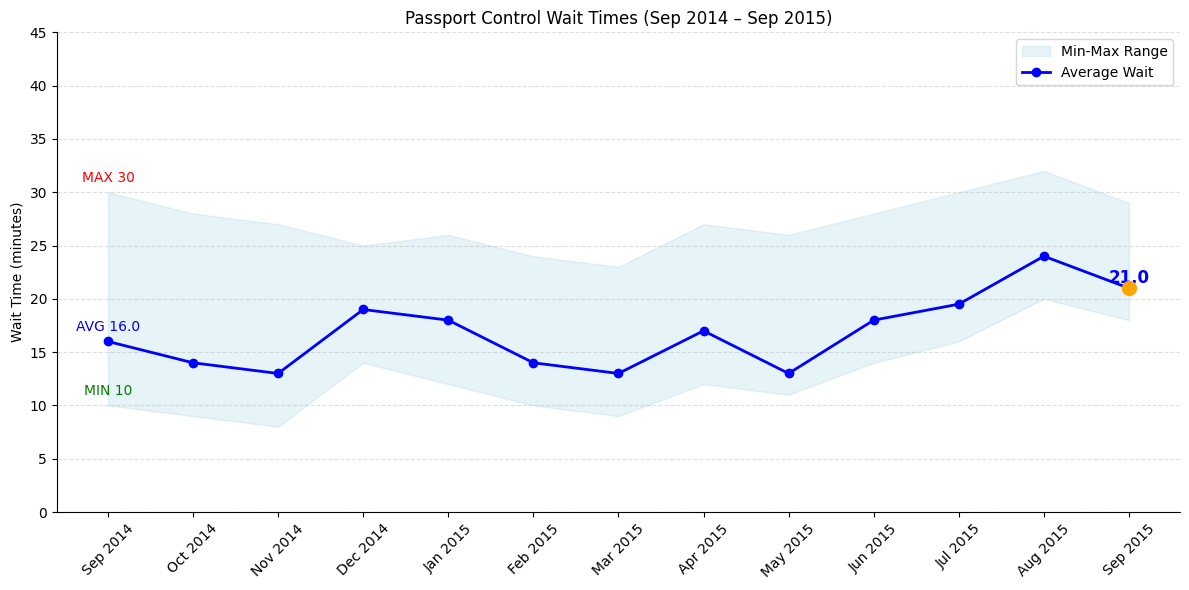

In [59]:


# Months
months = ["Sep 2014", "Oct 2014", "Nov 2014", "Dec 2014",
          "Jan 2015", "Feb 2015", "Mar 2015", "Apr 2015",
          "May 2015", "Jun 2015", "Jul 2015", "Aug 2015", "Sep 2015"]

# Min, Max, Average wait times
min_wait = [10, 9, 8, 14, 12, 10, 9, 12, 11, 14, 16, 20, 18]
max_wait = [30, 28, 27, 25, 26, 24, 23, 27, 26, 28, 30, 32, 29]
avg_wait = [16, 14, 13, 19, 18, 14, 13, 17, 13, 18, 19.5, 24, 21]

df = pd.DataFrame({
    "Month": months,
    "Min": min_wait,
    "Max": max_wait,
    "Average": avg_wait
})

plt.figure(figsize=(12,6))

# Shaded min-max range
plt.fill_between(df["Month"], df["Min"], df["Max"], color='lightblue', alpha=0.3, label="Min-Max Range")

# Average line
plt.plot(df["Month"], df["Average"], color='blue', marker='o', linewidth=2, label="Average Wait")

# Highlight and label final average (Sep 2015)
plt.scatter(df["Month"].iloc[-1], df["Average"].iloc[-1], color='orange', s=100, zorder=5)
plt.text(df["Month"].iloc[-1], df["Average"].iloc[-1]+0.5,
         str(df["Average"].iloc[-1]), ha='center', fontsize=12, fontweight='bold', color='blue')

# Show Min, Avg, Max on top of Sep 2014
plt.text(df["Month"].iloc[0], df["Max"].iloc[0]+1, f"MAX {df['Max'].iloc[0]}", ha='center', fontsize=10, color='red')
plt.text(df["Month"].iloc[0], df["Average"].iloc[0]+1, f"AVG {df['Average'].iloc[0]}", ha='center', fontsize=10, color='blue')
plt.text(df["Month"].iloc[0], df["Min"].iloc[0]+1, f"MIN {df['Min'].iloc[0]}", ha='center', fontsize=10, color='green')

# Labels and styling
plt.ylabel("Wait Time (minutes)")
plt.ylim(0, 45)
plt.title("Passport Control Wait Times (Sep 2014 – Sep 2015)")
plt.xticks(rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.tight_layout()
plt.show()
